# **IMPORT LIBRARY**

In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


# **READ DATA**

In [2]:
df = pd.read_csv('/content/dataset_edit.csv')
df

,id_umkm,nama_usaha,jenis_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan
0,28828567,UD. Alif Pamungkas,Kesehatan,1,56,5497149,3347794,Tokopedia,479,Belum Terdaftar,2015,-2149355,171000000,479
1,28828568,UD. Zidanar Panji,Perdagangan,5,44,7398384,39969661,Bukalapak,464,Terdaftar,2014,32571277,147000000,464
2,28828569,UD. Winda Jayengprana,unknown,74,51,8881762,25253355,Website Sendiri,383,Belum Terdaftar,2000,16371593,375000000,383
3,28828570,UD. Damaris Satria,Jasa,89,5,9576178,20700389,Website Sendiri,986,Belum Terdaftar,2003,11124211,282000000,986
4,28828571,UD. Qasya Wiratama,Jasa,91,59,9456853,4820810,Lazada,314,Belum Terdaftar,2002,-4636043,450000000,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,288222126,UD. Syana Ilir Rian,Jasa,62,63,6854562,48239150,Website Sendiri,162,Belum Terdaftar,2003,41384588,375000000,162
13560,288222127,UD. Bela Widhi,Pendidikan,70,50,804787,35210634,Website Sendiri,180,Terdaftar,2012,34405847,360000000,180
13561,288222128,UD. Bayu Alam,Kesehatan,50,37,8211715,8874364,Lazada,802,Terdaftar,2009,662649,261000000,802
13562,288222129,UD. Olla Sudharmo Udin,Pendidikan,11,NaN,6217989,41510653,Website Sendiri,122,Belum Terdaftar,2009,35292664,132000000,122


# **Exploratory Data Analysis (EDA)**

## **Cek Tipe Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_umkm                 13467 non-null  object
 1   nama_usaha              13564 non-null  object
 2   jenis_usaha             13467 non-null  object
 3   tenaga_kerja_perempuan  13444 non-null  object
 4   tenaga_kerja_laki_laki  13462 non-null  object
 5   aset                    13453 non-null  object
 6   omset                   13451 non-null  object
 7   marketplace             13447 non-null  object
 8   kapasitas_produksi      13442 non-null  object
 9   status_legalitas        13470 non-null  object
 10  tahun_berdiri           13469 non-null  object
 11  laba                    13452 non-null  object
 12  biaya_karyawan          13469 non-null  object
 13  jumlah_pelanggan        13453 non-null  object
dtypes: object(14)
memory usage: 1.4+ MB


### **Konversi type data**
- `tenaga_kerja_perempuan`: string -> Integer
- `tenaga_kerja_laki_laki`: string -> Integer
- `aset`: string -> Integer
- `omset`: string -> Integer
- `kapasitas_produksi`: string -> Integer
- `laba`: string -> Integer
- `biaya karyawan`: string -> Integer
- `jumlah_pelanggan`: string -> Integer

In [4]:
df['laba_negatif'] = df['laba'].apply(lambda x: 1 if '-' in str(x) else 0)
df['laba_negatif'].head()

,laba_negatif
0,1
1,0
2,0
3,0
4,1


In [5]:
# Fungsi untuk membersihkan data numerik
def clean_numeric(value):
    if pd.isna(value):
        return value
    try:
        return float(''.join(filter(lambda x: x.isdigit() or x == '.', str(value))))
    except:
        return None

kolom_numerik_int = ['tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki', 'kapasitas_produksi', 'jumlah_pelanggan']
kolom_numerik_float = ['aset', 'omset', 'laba', 'biaya_karyawan']

# Kolom numerik Integer
for col in kolom_numerik_int:
  df[col] = df[col].apply(clean_numeric).astype('Int64')

# Kolom numerik float
for col in kolom_numerik_float:
    df[col] = df[col].apply(clean_numeric).astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_umkm                 13467 non-null  object 
 1   nama_usaha              13564 non-null  object 
 2   jenis_usaha             13467 non-null  object 
 3   tenaga_kerja_perempuan  13408 non-null  Int64  
 4   tenaga_kerja_laki_laki  13429 non-null  Int64  
 5   aset                    13422 non-null  float64
 6   omset                   13423 non-null  float64
 7   marketplace             13447 non-null  object 
 8   kapasitas_produksi      13400 non-null  Int64  
 9   status_legalitas        13470 non-null  object 
 10  tahun_berdiri           13469 non-null  object 
 11  laba                    13407 non-null  float64
 12  biaya_karyawan          13430 non-null  float64
 13  jumlah_pelanggan        13412 non-null  Int64  
 14  laba_negatif            13564 non-null

In [6]:
df['laba'] = np.where(df['laba_negatif'] == 1, df['laba'] * -1, df['laba'])
df[['laba']].head()

,laba
0,-2149355.0
1,32571277.0
2,16371593.0
3,11124211.0
4,-4636043.0


## **Cek Missing Value dan persentase**

Kamu memiliki 15 columns.
Terdapat 13 kolom yang memiliki missing value.


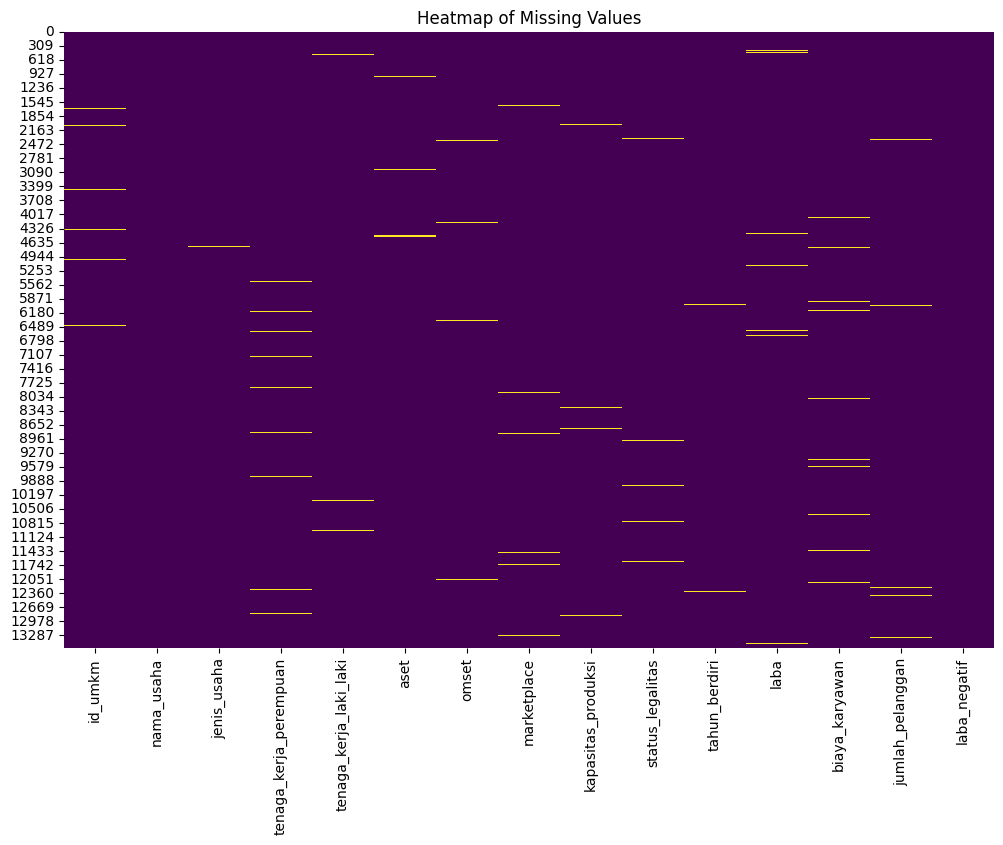

In [7]:
def missing_values_table(df):
        mis_val = df.isnull().sum()   # Total missing value
        mis_val_percent = 100 * df.isnull().sum() / len(df)   # persentase missing value
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)   # Buat tabel
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% dari Total Values'})    # beri nama kolom

        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% dari Total Values', ascending=False).round(1)    # Mengurutkan dari yang terbanyak missing valuenya

        # Print some summary information
        print ("Kamu memiliki " + str(df.shape[1]) + " columns.\n"
            "Terdapat " + str(mis_val_table_ren_columns.shape[0]) +
              " kolom yang memiliki missing value.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values = missing_values_table(df)
missing_values.head(20)

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


#### **Handling Missing Value dengan imputasi tidak biasa**

In [8]:
# Imputasi id
if 'id_umkm' in df.columns:
    df['id_umkm'] = pd.to_numeric(df['id_umkm'], errors='coerce')
    df['id_umkm'] = df['id_umkm'].fillna(df['id_umkm'].rolling(window=3, min_periods=1, center=True).median())
    median_id = df['id_umkm'].median()
    df['id_umkm'] = df['id_umkm'].fillna(median_id)
    df['id_umkm'] = df['id_umkm'].astype('object')
# Cek kembali missing value dan tipe data setelah imputasi
print("\nMissing values after imputing 'id_umkm':")
print(df.isnull().sum())
print("\nInfo after converting 'id_umkm' to object:")
df.info()


Missing values after imputing 'id_umkm':
id_umkm                     0
nama_usaha                  0
jenis_usaha                97
tenaga_kerja_perempuan    156
tenaga_kerja_laki_laki    135
aset                      142
omset                     141
marketplace               117
kapasitas_produksi        164
status_legalitas           94
tahun_berdiri              95
laba                      157
biaya_karyawan            134
jumlah_pelanggan          152
laba_negatif                0
dtype: int64

Info after converting 'id_umkm' to object:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_umkm                 13564 non-null  object 
 1   nama_usaha              13564 non-null  object 
 2   jenis_usaha             13467 non-null  object 
 3   tenaga_kerja_perempuan  13408 non-null  Int64  
 4   tenaga_kerja_laki_l

In [9]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].replace(['unknown', ''], np.nan) # Ganti unknown dan string kosong
    print(f"Kolom: {col}, Tipe: {df[col].dtype}, NaN awal: {df[col].isnull().sum()}")
print("-" * 40)

Kolom: id_umkm, Tipe: float64, NaN awal: 0
Kolom: nama_usaha, Tipe: object, NaN awal: 0
Kolom: jenis_usaha, Tipe: object, NaN awal: 131
Kolom: tenaga_kerja_perempuan, Tipe: Int64, NaN awal: 156
Kolom: tenaga_kerja_laki_laki, Tipe: Int64, NaN awal: 135
Kolom: aset, Tipe: float64, NaN awal: 142
Kolom: omset, Tipe: float64, NaN awal: 141
Kolom: marketplace, Tipe: object, NaN awal: 153
Kolom: kapasitas_produksi, Tipe: Int64, NaN awal: 164
Kolom: status_legalitas, Tipe: object, NaN awal: 130
Kolom: tahun_berdiri, Tipe: object, NaN awal: 128
Kolom: laba, Tipe: float64, NaN awal: 157
Kolom: biaya_karyawan, Tipe: float64, NaN awal: 134
Kolom: jumlah_pelanggan, Tipe: Int64, NaN awal: 152
Kolom: laba_negatif, Tipe: int64, NaN awal: 0
----------------------------------------


In [10]:
def status(df, column_name, step_name):
    nan_count = df[column_name].isnull().sum()
    print(f"Status setelah {step_name} untuk '{column_name}': NaN tersisa = {nan_count}")

##### **Kolom** `kapasitas_produksi`

In [11]:
# Aturan 1: kapasitas_produksi <- jumlah_pelanggan (jika kapasitas_produksi NaN)
col_target, col_source = 'kapasitas_produksi', 'jumlah_pelanggan'
if col_target in df.columns and col_source in df.columns:
    # Hanya isi jika sumber tidak NaN untuk menghindari mengisi NaN dengan NaN lain secara tidak sengaja
    fill_values = df[col_source].where(df[col_target].isnull() & df[col_source].notnull())
    df[col_target] = df[col_target].fillna(fill_values)
    status(df, col_target, "Aturan 1 (kapasitas_produksi <- jumlah_pelanggan)")

Status setelah Aturan 1 (kapasitas_produksi <- jumlah_pelanggan) untuk 'kapasitas_produksi': NaN tersisa = 1


In [12]:
df_nan_kapasitas = df[df['kapasitas_produksi'].isnull()]
print("\nBaris dengan 'kapasitas_produksi' yang masih NaN:")
df_nan_kapasitas


Baris dengan 'kapasitas_produksi' yang masih NaN:


,id_umkm,nama_usaha,jenis_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan,laba_negatif
6223,288214790.0,UD. Verdi Anggara,Kesehatan,25,67,3013178.0,31610086.0,Lazada,<NA>,Belum Terdaftar,2011,28596908.0,276000000.0,<NA>,0


##### Kolom `jumlah_pelanggan`

In [13]:
# Aturan 2: jumlah_pelanggan <- kapasitas_produksi (jika jumlah_pelanggan NaN)
col_target, col_source = 'jumlah_pelanggan', 'kapasitas_produksi'
if col_target in df.columns and col_source in df.columns:
    fill_values = df[col_source].where(df[col_target].isnull() & df[col_source].notnull())
    df[col_target] = df[col_target].fillna(fill_values)
    status(df, col_target, "Aturan 2 (jumlah_pelanggan <- kapasitas_produksi)")

Status setelah Aturan 2 (jumlah_pelanggan <- kapasitas_produksi) untuk 'jumlah_pelanggan': NaN tersisa = 1


In [14]:
df_nan_kapasitas = df[df['jumlah_pelanggan'].isnull()]
print("\nBaris dengan 'jumlah_pelanggan' yang masih NaN:")
df_nan_kapasitas


Baris dengan 'jumlah_pelanggan' yang masih NaN:


,id_umkm,nama_usaha,jenis_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan,laba_negatif
6223,288214790.0,UD. Verdi Anggara,Kesehatan,25,67,3013178.0,31610086.0,Lazada,<NA>,Belum Terdaftar,2011,28596908.0,276000000.0,<NA>,0


##### Kolom `tenaga_kerja_perempuan`

In [15]:
col_target = 'tenaga_kerja_perempuan'
if col_target in df.columns:
    df[col_target].fillna(0, inplace=True)
    status(df, col_target, "Aturan 3 (tenaga_kerja_perempuan <- 0)")

Status setelah Aturan 3 (tenaga_kerja_perempuan <- 0) untuk 'tenaga_kerja_perempuan': NaN tersisa = 0


Kolom `tenaga_kerja_laki`

In [16]:
col_target = 'tenaga_kerja_laki_laki'
if col_target in df.columns:
    df[col_target].fillna(0, inplace=True)
    status(df, col_target, "Aturan 4 (tenaga_kerja_laki_laki <- 0)")

Status setelah Aturan 4 (tenaga_kerja_laki_laki <- 0) untuk 'tenaga_kerja_laki_laki': NaN tersisa = 0


##### Kolom `Laba`

In [17]:
col_target, col_omset, col_aset = 'laba', 'omset', 'aset'
if all(c in df.columns for c in [col_target, col_omset, col_aset]):
    condition = df[col_target].isnull() & df[col_omset].notnull() & df[col_aset].notnull()
    df.loc[condition, col_target] = df.loc[condition, col_omset] - df.loc[condition, col_aset]
    status(df, col_target, "Aturan 5 (laba <- omset - aset)")

Status setelah Aturan 5 (laba <- omset - aset) untuk 'laba': NaN tersisa = 0


##### Kolom `aset`

In [18]:
col_target, col_omset, col_laba = 'aset', 'omset', 'laba'
if all(c in df.columns for c in [col_target, col_omset, col_laba]):
    condition = df[col_target].isnull() & df[col_omset].notnull() & df[col_laba].notnull()
    df.loc[condition, col_target] = df.loc[condition, col_omset] - df.loc[condition, col_laba]
    status(df, col_target, "Aturan 6 (aset <- omset - laba)")

Status setelah Aturan 6 (aset <- omset - laba) untuk 'aset': NaN tersisa = 0


##### Kolom `omset`

In [19]:
col_target, col_laba, col_aset = 'omset', 'laba', 'aset'
if all(c in df.columns for c in [col_target, col_laba, col_aset]):
    condition = df[col_target].isnull() & df[col_laba].notnull() & df[col_aset].notnull()
    df.loc[condition, col_target] = df.loc[condition, col_laba] + df.loc[condition, col_aset]
    status(df, col_target, "Aturan 7 (omset <- laba + aset)")

Status setelah Aturan 7 (omset <- laba + aset) untuk 'omset': NaN tersisa = 0


##### Kolom `biaya_karyawan`

In [20]:
col_target, col_ref = 'biaya_karyawan', 'omset'
print(f"\n--- Memproses Aturan 8 untuk: {col_target} ---")
if col_target in df.columns and col_ref in df.columns:
    if df[col_ref].isnull().any():
        print(f"Peringatan untuk Aturan 8: Kolom referensi '{col_ref}' (Omset) masih NaN. Mengisi dengan median sementara.")
        df[col_ref].fillna(df[col_ref].median(), inplace=True)

    if not df[col_ref].isnull().any(): # Hanya lanjutkan jika omset (col_ref) tidak NaN
        try:
            df['omset_bin_temp'] = pd.qcut(df[col_ref], q=3, labels=['Rendah', 'Sedang', 'Tinggi'], duplicates='drop')
            print(f"Debug Aturan 8: Binning 'omset_bin_temp' untuk '{col_target}':\n{df['omset_bin_temp'].value_counts(dropna=False)}")

            # Pastikan kolom target adalah float untuk menerima mean dan NaN jika ada
            if not pd.api.types.is_float_dtype(df[col_target].dtype):
                 # Konversi ke float, error menjadi NaN. Jika sudah float, tidak ada perubahan signifikan.
                df[col_target] = pd.to_numeric(df[col_target], errors='coerce')
            print(f"Debug Aturan 8: dtype '{col_target}' setelah dipastikan numerik: {df[col_target].dtype}")

            mean_map = df.groupby('omset_bin_temp', observed=True)[col_target].mean().to_dict()
            print(f"Debug Aturan 8: mean_map untuk '{col_target}': {mean_map}")

            fill_values_mean = df['omset_bin_temp'].map(mean_map)
            print(f"Debug Aturan 8: fill_values_mean (sampel): \n{fill_values_mean.head()}")
            if np.isinf(fill_values_mean.dropna()).any():
                print(f"WARNING Aturan 8: 'fill_values_mean' untuk {col_target} mengandung infinite values. Mengganti dengan NaN.")
                fill_values_mean.replace([np.inf, -np.inf], np.nan, inplace=True)

            nan_mask_target = df[col_target].isnull()
            if nan_mask_target.any():
                print(f"Debug Aturan 8: Mengisi {nan_mask_target.sum()} NaN di '{col_target}' menggunakan .loc")
                df.loc[nan_mask_target, col_target] = fill_values_mean[nan_mask_target]

            if df[col_target].isnull().any(): # Fallback jika masih ada NaN
                global_mean_target = df[col_target].mean()
                print(f"Debug Aturan 8: Fallback, mengisi NaN yang tersisa di '{col_target}' dengan mean global: {global_mean_target}")
                df[col_target].fillna(global_mean_target, inplace=True)

            df.drop('omset_bin_temp', axis=1, inplace=True, errors='ignore')
        except ValueError as e_qcut: # Error dari qcut
            print(f"Error saat binning '{col_ref}' untuk imputasi '{col_target}' (Aturan 8 - qcut): {e_qcut}. Menggunakan mean global.")
            df[col_target].fillna(df[col_target].mean(), inplace=True)
        except Exception as e_general: # Error lain dalam blok try
            print(f"Error umum saat memproses Aturan 8 untuk '{col_target}': {e_general}. Menggunakan mean global.")
            df[col_target].fillna(df[col_target].mean(), inplace=True)
    else: # Jika col_ref (omset) masih NaN setelah upaya imputasi darurat
         print(f"Peringatan Aturan 8: Kolom '{col_ref}' (Omset) masih NaN setelah upaya imputasi, menggunakan mean global untuk '{col_target}'.")
         df[col_target].fillna(df[col_target].mean(), inplace=True)
    status(df, col_target, "Aturan 8 (biaya_karyawan via omset_bin mean)")


--- Memproses Aturan 8 untuk: biaya_karyawan ---
Debug Aturan 8: Binning 'omset_bin_temp' untuk 'biaya_karyawan':
omset_bin_temp
Rendah    4522
Tinggi    4522
Sedang    4520
Name: count, dtype: int64
Debug Aturan 8: dtype 'biaya_karyawan' setelah dipastikan numerik: float64
Debug Aturan 8: mean_map untuk 'biaya_karyawan': {'Rendah': 296336609.33660936, 'Sedang': 296645010.0468855, 'Tinggi': 296131649.53062135}
Debug Aturan 8: fill_values_mean (sampel): 
0    2.963366e+08
1    2.961316e+08
2    2.966450e+08
3    2.966450e+08
4    2.963366e+08
Name: omset_bin_temp, dtype: category
Categories (3, float64): [2.963366e+08 < 2.966450e+08 < 2.961316e+08]
Error umum saat memproses Aturan 8 untuk 'biaya_karyawan': Object with dtype category cannot perform the numpy op isinf. Menggunakan mean global.
Status setelah Aturan 8 (biaya_karyawan via omset_bin mean) untuk 'biaya_karyawan': NaN tersisa = 0


##### Kolom `marketplace`, `jenis_usaha`, dan `status_legalitas`

In [21]:
cols_categorical_conditional = ['marketplace', 'jenis_usaha', 'status_legalitas']
col_ref_cat = 'omset'
print(f"\n--- Memproses Aturan 9 untuk: {cols_categorical_conditional} ---")
if col_ref_cat in df.columns:
    if df[col_ref_cat].isnull().any(): # Seharusnya sudah diisi
        print(f"Peringatan untuk Aturan 9: Kolom '{col_ref_cat}' masih NaN. Mengisi dengan median sementara.")
        df[col_ref_cat].fillna(df[col_ref_cat].median(), inplace=True)

    if not df[col_ref_cat].isnull().any():
        try:
            df['omset_bin_temp_cat'] = pd.qcut(df[col_ref_cat], q=3, labels=['Rendah', 'Sedang', 'Tinggi'], duplicates='drop')
            print(f"Debug Aturan 9: Binning 'omset_bin_temp_cat' untuk kategorikal:\n{df['omset_bin_temp_cat'].value_counts(dropna=False)}")

            for col_cat in cols_categorical_conditional:
                if col_cat in df.columns:
                    overall_mode_cat = df[col_cat].mode()
                    if not overall_mode_cat.empty: overall_mode_cat = overall_mode_cat[0]
                    else:
                        print(f"Peringatan Aturan 9: Tidak ada modus global untuk '{col_cat}', imputasi mungkin tidak lengkap.")
                        continue # Skip ke kolom kategorikal berikutnya jika tidak ada modus global

                    # Menggunakan observed=True
                    mode_map = df.groupby('omset_bin_temp_cat', observed=True)[col_cat].apply(lambda x: x.mode()[0] if not x.mode().empty else overall_mode_cat).to_dict()
                    print(f"Debug Aturan 9: mode_map untuk '{col_cat}': {mode_map}")

                    fill_values_mode = df['omset_bin_temp_cat'].map(mode_map)
                    print(f"Debug Aturan 9: fill_values_mode (sampel) untuk '{col_cat}': \n{fill_values_mode.head()}")

                    nan_mask_cat_target = df[col_cat].isnull()
                    if nan_mask_cat_target.any():
                        print(f"Debug Aturan 9: Mengisi {nan_mask_cat_target.sum()} NaN di '{col_cat}' menggunakan .loc")
                        df.loc[nan_mask_cat_target, col_cat] = fill_values_mode[nan_mask_cat_target]

                    if df[col_cat].isnull().any(): # Fallback
                        print(f"Debug Aturan 9: Fallback, mengisi NaN yang tersisa di '{col_cat}' dengan modus global: {overall_mode_cat}")
                        df[col_cat].fillna(overall_mode_cat, inplace=True)
                    status(df, col_cat, f"Aturan 9 ({col_cat} via omset_bin mode)")
            df.drop('omset_bin_temp_cat', axis=1, inplace=True, errors='ignore')
        except ValueError as e_qcut_cat:
            print(f"Error saat binning '{col_ref_cat}' untuk imputasi kategorikal (Aturan 9 - qcut): {e_qcut_cat}. Menggunakan modus global.")
            for col_cat in cols_categorical_conditional:
                if col_cat in df.columns:
                    df_mode_val = df[col_cat].mode()
                    if not df_mode_val.empty: df[col_cat].fillna(df_mode_val[0], inplace=True)
                    status(df, col_cat, f"Aturan 9 ({col_cat} via modus global - fallback error binning)")
        except Exception as e_general_cat:
             print(f"Error umum saat memproses Aturan 9 untuk kategorikal: {e_general_cat}. Menggunakan modus global.")
             for col_cat in cols_categorical_conditional:
                if col_cat in df.columns:
                    df_mode_val = df[col_cat].mode()
                    if not df_mode_val.empty: df[col_cat].fillna(df_mode_val[0], inplace=True)
                    status(df, col_cat, f"Aturan 9 ({col_cat} via modus global - fallback error umum)")
    else:
        for col_cat in cols_categorical_conditional:
            if col_cat in df.columns:
                df_mode_val = df[col_cat].mode()
                if not df_mode_val.empty: df[col_cat].fillna(df_mode_val[0], inplace=True)
                status(df, col_cat, f"Aturan 9 ({col_cat} via modus global - fallback omset NaN)")


--- Memproses Aturan 9 untuk: ['marketplace', 'jenis_usaha', 'status_legalitas'] ---
Debug Aturan 9: Binning 'omset_bin_temp_cat' untuk kategorikal:
omset_bin_temp_cat
Rendah    4522
Tinggi    4522
Sedang    4520
Name: count, dtype: int64
Debug Aturan 9: mode_map untuk 'marketplace': {'Rendah': 'Lazada', 'Sedang': 'Website Sendiri', 'Tinggi': 'Website Sendiri'}
Debug Aturan 9: fill_values_mode (sampel) untuk 'marketplace': 
0             Lazada
1    Website Sendiri
2    Website Sendiri
3    Website Sendiri
4             Lazada
Name: omset_bin_temp_cat, dtype: object
Debug Aturan 9: Mengisi 153 NaN di 'marketplace' menggunakan .loc
Status setelah Aturan 9 (marketplace via omset_bin mode) untuk 'marketplace': NaN tersisa = 0
Debug Aturan 9: mode_map untuk 'jenis_usaha': {'Rendah': 'Pendidikan', 'Sedang': 'Jasa', 'Tinggi': 'Perdagangan'}
Debug Aturan 9: fill_values_mode (sampel) untuk 'jenis_usaha': 
0     Pendidikan
1    Perdagangan
2           Jasa
3           Jasa
4     Pendidikan
Nam

##### Kolom `tahun_berdiri`

In [22]:
col_target = 'tahun_berdiri'
if col_target in df.columns:
    mode_tahun = df[col_target].mode()
    if not mode_tahun.empty:
        df[col_target].fillna(mode_tahun[0], inplace=True)
    else:
        df[col_target].fillna(2000, inplace=True) # Fallback ekstrem
    status(df, col_target, "Aturan 10 (tahun_berdiri <- modus)")

Status setelah Aturan 10 (tahun_berdiri <- modus) untuk 'tahun_berdiri': NaN tersisa = 0


In [23]:
print("\n--- Kondisi Akhir Setelah Semua Imputasi (Debugging Ditambahkan) ---")
for col in df.columns:
    print(f"Kolom: {col}, Tipe: {df[col].dtype}, NaN akhir: {df[col].isnull().sum()}")


--- Kondisi Akhir Setelah Semua Imputasi (Debugging Ditambahkan) ---
Kolom: id_umkm, Tipe: float64, NaN akhir: 0
Kolom: nama_usaha, Tipe: object, NaN akhir: 0
Kolom: jenis_usaha, Tipe: object, NaN akhir: 0
Kolom: tenaga_kerja_perempuan, Tipe: Int64, NaN akhir: 0
Kolom: tenaga_kerja_laki_laki, Tipe: Int64, NaN akhir: 0
Kolom: aset, Tipe: float64, NaN akhir: 0
Kolom: omset, Tipe: float64, NaN akhir: 0
Kolom: marketplace, Tipe: object, NaN akhir: 0
Kolom: kapasitas_produksi, Tipe: Int64, NaN akhir: 1
Kolom: status_legalitas, Tipe: object, NaN akhir: 0
Kolom: tahun_berdiri, Tipe: object, NaN akhir: 0
Kolom: laba, Tipe: float64, NaN akhir: 0
Kolom: biaya_karyawan, Tipe: float64, NaN akhir: 0
Kolom: jumlah_pelanggan, Tipe: Int64, NaN akhir: 1
Kolom: laba_negatif, Tipe: int64, NaN akhir: 0
Kolom: omset_bin_temp, Tipe: category, NaN akhir: 0


In [24]:
cols_fallback_median_imputation = ['kapasitas_produksi', 'jumlah_pelanggan']

print("\n--- Memproses Imputasi Fallback dengan Median ---")
for col in cols_fallback_median_imputation:
    if col in df.columns and df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Kolom '{col}' diimputasi dengan median: {median_val}")
        status(df, col, f"Fallback Median untuk {col}")
    elif col not in df.columns:
        print(f"Kolom '{col}' tidak ditemukan untuk fallback imputasi.")


--- Memproses Imputasi Fallback dengan Median ---
Kolom 'kapasitas_produksi' diimputasi dengan median: 501.0
Status setelah Fallback Median untuk kapasitas_produksi untuk 'kapasitas_produksi': NaN tersisa = 0
Kolom 'jumlah_pelanggan' diimputasi dengan median: 501.0
Status setelah Fallback Median untuk jumlah_pelanggan untuk 'jumlah_pelanggan': NaN tersisa = 0


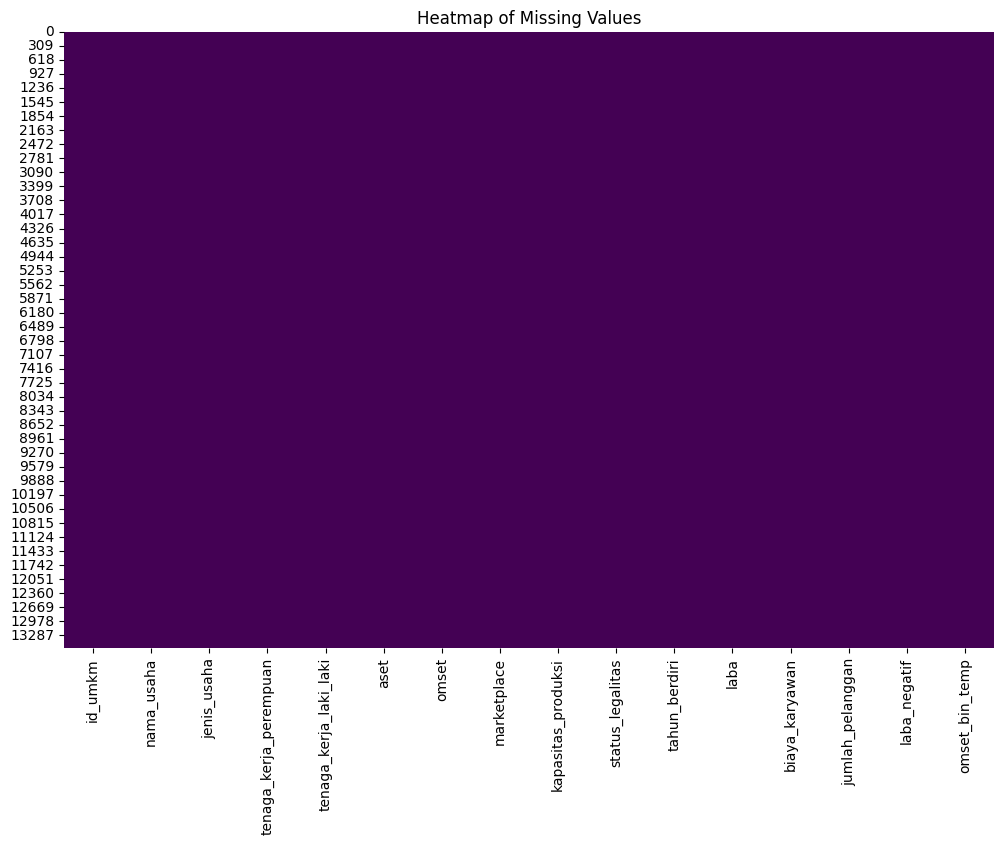

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

## Feature Engineering

In [26]:
# Membuat fitur total_tenaga_kerja
if 'tenaga_kerja_perempuan' in df.columns and 'tenaga_kerja_laki_laki' in df.columns:
    df['total_tenaga_kerja'] = df['tenaga_kerja_perempuan'] + df['tenaga_kerja_laki_laki']
else: # Fallback jika kolom tidak ada (seharusnya sudah ada dan diimputasi 0)
    df['total_tenaga_kerja'] = 0

In [27]:
import datetime
tahun_sekarang = datetime.datetime.now().year

# 2. Konversi 'tahun_berdiri' ke numerik dan hitung 'usia_usaha'
# pd.to_numeric akan mengkonversi string angka menjadi tipe numerik (float atau int).
# errors='coerce' akan mengubah jadi NaN jika ada yg tidak bisa dikonversi (seharusnya tidak ada jika data "bersih")
df['usia_usaha'] = tahun_sekarang - pd.to_numeric(df['tahun_berdiri'], errors='coerce')

In [28]:
df['profit_margin'] = df['laba'] / (df['omset'] + 1)
df['roa'] = df['laba'] / (df['aset'] + 1)
df['asset_turnover'] = df['omset'] / (df['aset'] + 1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id_umkm                 13564 non-null  float64 
 1   nama_usaha              13564 non-null  object  
 2   jenis_usaha             13564 non-null  object  
 3   tenaga_kerja_perempuan  13564 non-null  Int64   
 4   tenaga_kerja_laki_laki  13564 non-null  Int64   
 5   aset                    13564 non-null  float64 
 6   omset                   13564 non-null  float64 
 7   marketplace             13564 non-null  object  
 8   kapasitas_produksi      13564 non-null  Int64   
 9   status_legalitas        13564 non-null  object  
 10  tahun_berdiri           13564 non-null  object  
 11  laba                    13564 non-null  float64 
 12  biaya_karyawan          13564 non-null  float64 
 13  jumlah_pelanggan        13564 non-null  Int64   
 14  laba_negatif          

## Simpan New CSV

In [30]:
# prompt: save df baru dengan nama dataset_umkm

df.to_csv('dataset_umkm.csv', index=False)
print("DataFrame 'df' berhasil disimpan sebagai 'dataset_umkm.csv'")

DataFrame 'df' berhasil disimpan sebagai 'dataset_umkm.csv'


In [31]:
df = pd.read_csv('/content/dataset_umkm.csv')
df.head()

,id_umkm,nama_usaha,jenis_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,marketplace,kapasitas_produksi,status_legalitas,...,laba,biaya_karyawan,jumlah_pelanggan,laba_negatif,omset_bin_temp,total_tenaga_kerja,usia_usaha,profit_margin,roa,asset_turnover
0,28828567.0,UD. Alif Pamungkas,Kesehatan,1,56,5497149.0,3347794.0,Tokopedia,479,Belum Terdaftar,...,-2149355.0,171000000.0,479,1,Rendah,57,10,-0.642021,-0.390994,0.609005
1,28828568.0,UD. Zidanar Panji,Perdagangan,5,44,7398384.0,39969661.0,Bukalapak,464,Terdaftar,...,32571277.0,147000000.0,464,0,Tinggi,49,11,0.814900,4.402485,5.402485
2,28828569.0,UD. Winda Jayengprana,Jasa,74,51,8881762.0,25253355.0,Website Sendiri,383,Belum Terdaftar,...,16371593.0,375000000.0,383,0,Sedang,125,25,0.648294,1.843282,2.843282
3,28828570.0,UD. Damaris Satria,Jasa,89,5,9576178.0,20700389.0,Website Sendiri,986,Belum Terdaftar,...,11124211.0,282000000.0,986,0,Sedang,94,22,0.537391,1.161654,2.161654
4,28828571.0,UD. Qasya Wiratama,Jasa,91,59,9456853.0,4820810.0,Lazada,314,Belum Terdaftar,...,-4636043.0,450000000.0,314,1,Rendah,150,23,-0.961673,-0.490231,0.509769


## **Visualisasi Data**

### **Data Numerik**

#### Heatmap Korelasi

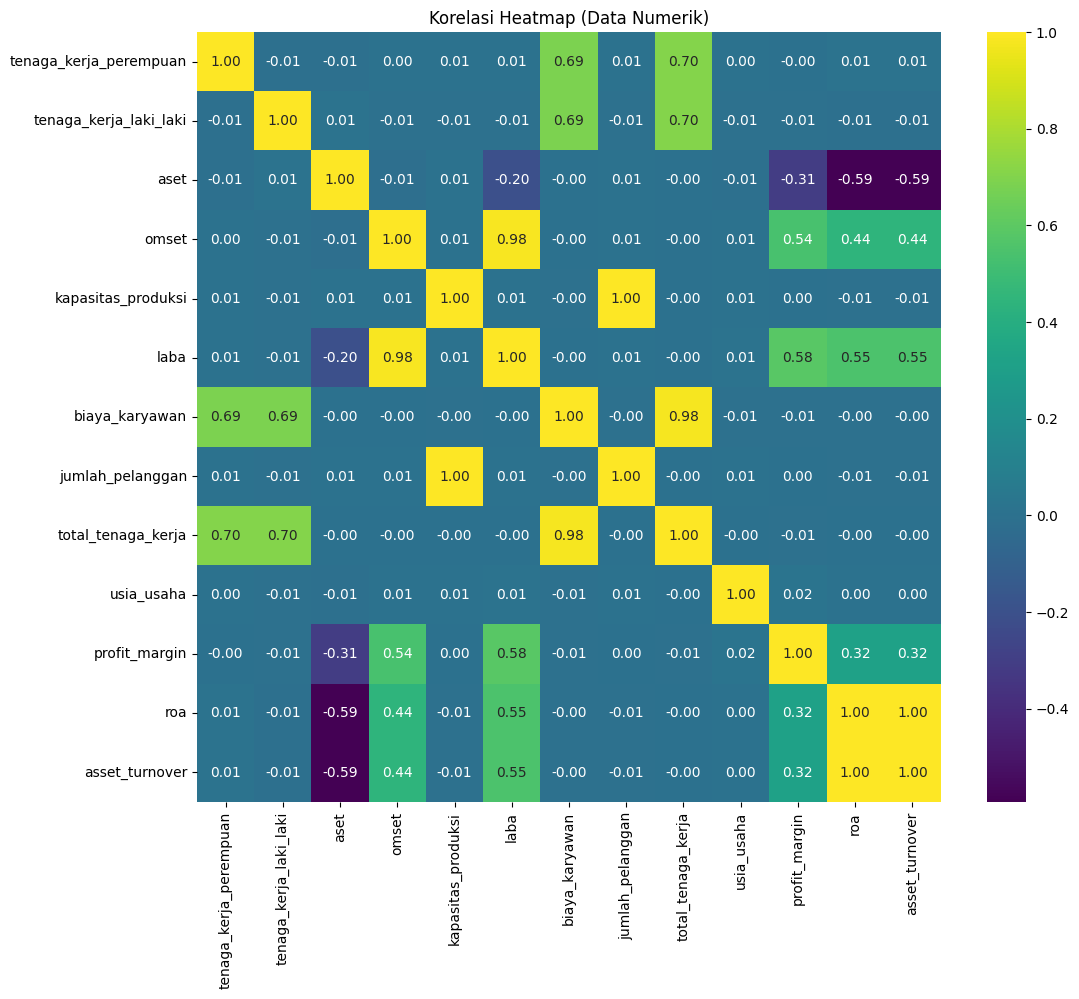

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
kolom_numerik = [
    'tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki', 'aset', 'omset',
    'kapasitas_produksi', 'laba', 'biaya_karyawan', 'jumlah_pelanggan', 'total_tenaga_kerja',
    'usia_usaha', 'profit_margin', 'roa', 'asset_turnover'
]
correlation_matrix = df[kolom_numerik].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Korelasi Heatmap (Data Numerik)')
plt.show()

#### Histogram Distribusi Laba per Jenis Usaha

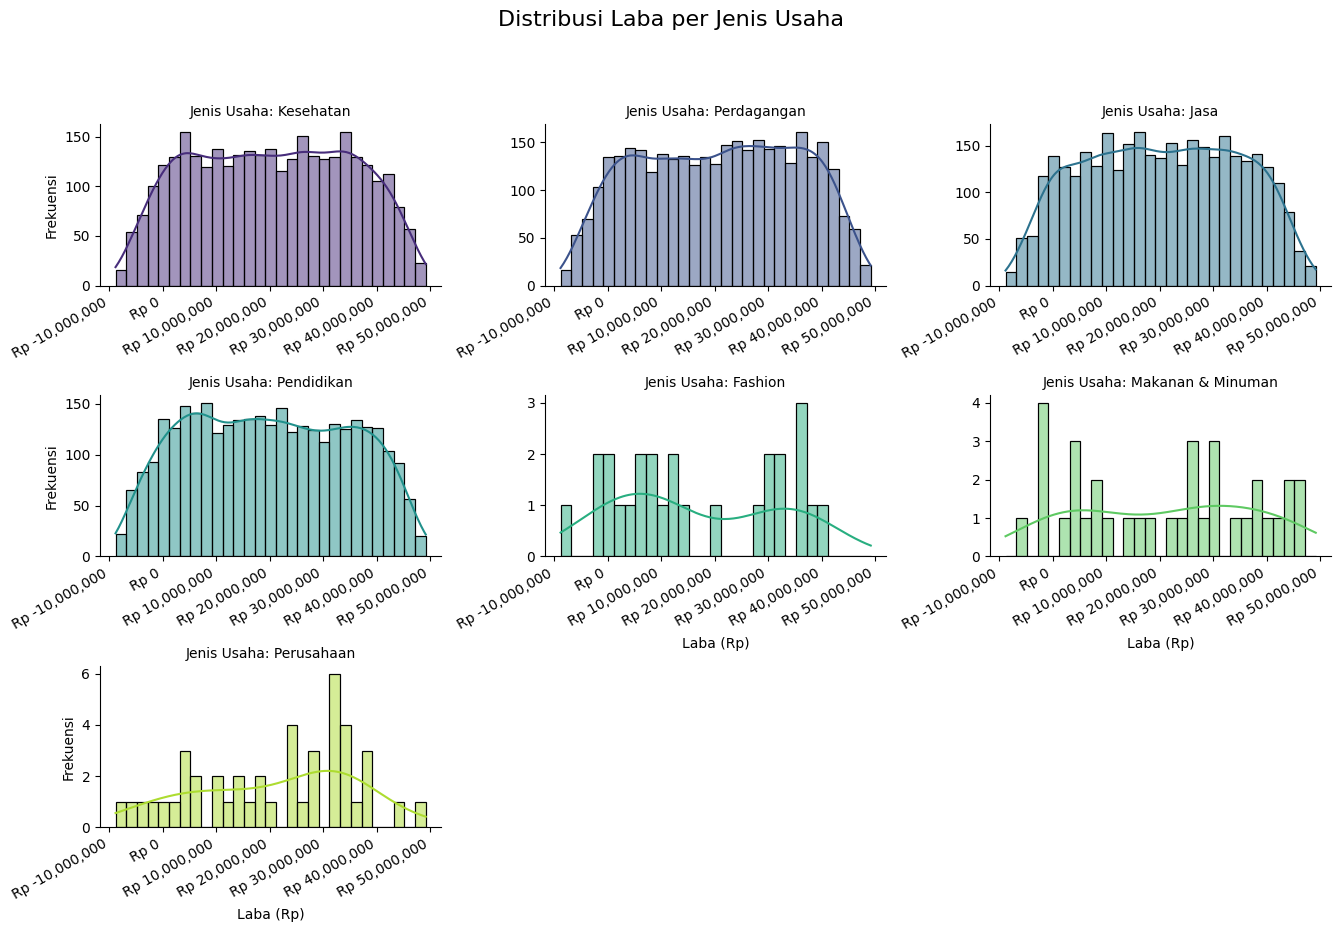


--- Rata-rata Laba per Jenis Usaha (dalam Rupiah) ---
jenis_usaha
Makanan & Minuman    Rp 21,105,236
Perusahaan           Rp 21,004,328
Perdagangan          Rp 20,717,964
Jasa                 Rp 20,378,031
Kesehatan            Rp 20,301,216
Pendidikan           Rp 19,912,494
Fashion              Rp 16,690,681
Name: laba, dtype: object


In [33]:
if 'jenis_usaha' in df.columns and 'laba' in df.columns:
    n_cols_facet = 3 if df['jenis_usaha'].nunique() > 3 else max(1, df['jenis_usaha'].nunique()) # Pastikan minimal 1

    # --- MODIFIKASI UNTUK WARNA VIRIDIS PER FACET ---
    g = sns.displot(
        df,
        x="laba",
        col="jenis_usaha",
        hue="jenis_usaha",
        palette="viridis",
        legend=False,

        col_wrap=n_cols_facet,
        kind="hist",
        kde=True,
        facet_kws=dict(margin_titles=True, sharey=False, sharex=False),
        height=3,
        aspect=1.5,
        bins='auto'
    )

    g.set_axis_labels("Laba (Rp)", "Frekuensi")
    g.set_titles("Jenis Usaha: {col_name}") # Judul facet akan tetap menunjukkan jenis usaha
    g.fig.suptitle('Distribusi Laba per Jenis Usaha', y=1.03, fontsize=16)

    def rupiah_formatter(x, pos):
        return f'Rp {x:,.0f}'

    for ax in g.axes.flat:
        ax.xaxis.set_major_formatter(plt.FuncFormatter(rupiah_formatter))
        if len(ax.get_xticklabels()) > 5:
             plt.setp(ax.get_xticklabels(), rotation=30, ha="right")


    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

    # ... (sisa kode untuk mencetak rata-rata laba) ...
    print("\n--- Rata-rata Laba per Jenis Usaha (dalam Rupiah) ---")
    laba_per_jenis_usaha = df.groupby('jenis_usaha')['laba'].mean().sort_values(ascending=False)
    if not laba_per_jenis_usaha.empty:
        laba_per_jenis_usaha_formatted = laba_per_jenis_usaha.apply(
            lambda x: f"Rp {x:,.0f}" if pd.notna(x) else "Data Tidak Cukup"
        )
        print(laba_per_jenis_usaha_formatted)
    else:
        print("Tidak ada data rata-rata laba per jenis usaha untuk ditampilkan.")

#### Histogram Distribusi Laba per Marketplace

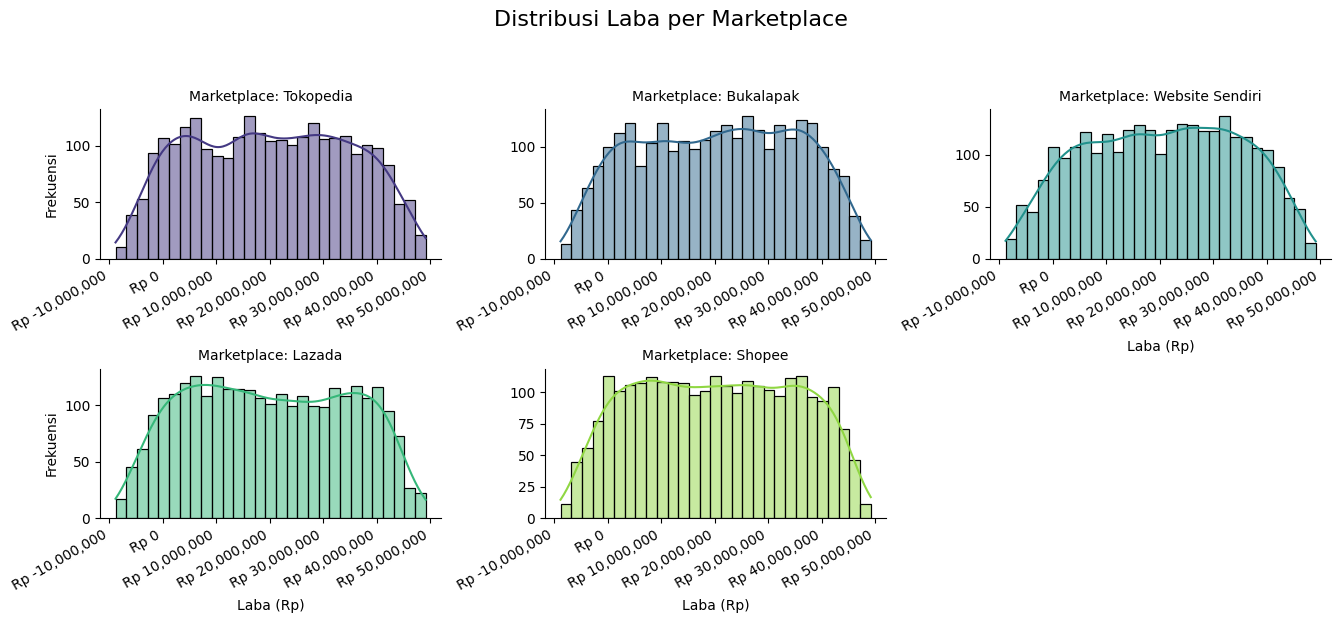


--- Rata-rata Laba per Marketplace (dalam Rupiah) ---
marketplace
Website Sendiri    Rp 20,620,075
Bukalapak          Rp 20,541,090
Shopee             Rp 20,354,109
Tokopedia          Rp 20,133,141
Lazada             Rp 19,984,260
Name: laba, dtype: object


In [34]:
if 'marketplace' in df.columns and 'laba' in df.columns:
    n_cols_facet = 3 if df['jenis_usaha'].nunique() > 3 else max(1, df['jenis_usaha'].nunique()) # Pastikan minimal 1

    # --- MODIFIKASI UNTUK WARNA VIRIDIS PER FACET ---
    g = sns.displot(
        df,
        x="laba",
        col="marketplace",
        hue="marketplace",    # Tambahkan hue berdasarkan jenis_usaha
        palette="viridis",    # Gunakan palette viridis
        legend=False,         # Matikan legenda default jika judul facet sudah cukup
                              # atau atur legend=True dan posisinya jika diperlukan
        col_wrap=n_cols_facet,
        kind="hist",
        kde=True,             # Jika Anda ingin KDE, ini juga akan diwarnai
        facet_kws=dict(margin_titles=True, sharey=False, sharex=False),
        height=3,
        aspect=1.5,
        bins='auto'
    )

    g.set_axis_labels("Laba (Rp)", "Frekuensi")
    g.set_titles("Marketplace: {col_name}") # Judul facet akan tetap menunjukkan jenis usaha
    g.fig.suptitle('Distribusi Laba per Marketplace', y=1.03, fontsize=16)

    def rupiah_formatter(x, pos):
        return f'Rp {x:,.0f}'

    for ax in g.axes.flat:
        ax.xaxis.set_major_formatter(plt.FuncFormatter(rupiah_formatter))
        if len(ax.get_xticklabels()) > 5:
             plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

    print("\n--- Rata-rata Laba per Marketplace (dalam Rupiah) ---")
    laba_per_jenis_usaha = df.groupby('marketplace')['laba'].mean().sort_values(ascending=False)
    if not laba_per_jenis_usaha.empty:
        laba_per_jenis_usaha_formatted = laba_per_jenis_usaha.apply(
            lambda x: f"Rp {x:,.0f}" if pd.notna(x) else "Data Tidak Cukup"
        )
        print(laba_per_jenis_usaha_formatted)
    else:
        print("Tidak ada data rata-rata laba per jenis usaha untuk ditampilkan.")

#### Status Laba

In [35]:
# Buat kolom 'status_laba' berdasarkan kondisi laba
# Jika laba > 0, maka 'Positif'. Jika <= 0 (termasuk 0), maka 'Negatif'.
if 'laba' in df.columns:
    df['status_laba'] = np.where(df['laba'] > 0, 'Laba Positif', 'Laba Negatif / Nol')
    print("Kolom 'status_laba' berhasil dibuat.")
    print(df[['laba', 'status_laba']].head())
else:
    print("Kolom 'laba' tidak ditemukan.")

Kolom 'status_laba' berhasil dibuat.
         laba         status_laba
0  -2149355.0  Laba Negatif / Nol
1  32571277.0        Laba Positif
2  16371593.0        Laba Positif
3  11124211.0        Laba Positif
4  -4636043.0  Laba Negatif / Nol


In [36]:
if 'marketplace' in df.columns and 'status_laba' in df.columns:
    # Frekuensi absolut
    print("\n--- Frekuensi Status Laba per Marketplace (Jumlah UMKM) ---")
    crosstab_marketplace = pd.crosstab(df['marketplace'], df['status_laba'])
    print(crosstab_marketplace)

    # Frekuensi relatif (persentase per marketplace)
    print("\n--- Proporsi Status Laba per Marketplace (%) ---")
    crosstab_marketplace_norm = pd.crosstab(df['marketplace'], df['status_laba'], normalize='index') * 100
    print(crosstab_marketplace_norm.round(1))


--- Frekuensi Status Laba per Marketplace (Jumlah UMKM) ---
status_laba      Laba Negatif / Nol  Laba Positif
marketplace                                      
Bukalapak                       247          2463
Lazada                          262          2488
Shopee                          229          2396
Tokopedia                       246          2381
Website Sendiri                 228          2624

--- Proporsi Status Laba per Marketplace (%) ---
status_laba      Laba Negatif / Nol  Laba Positif
marketplace                                      
Bukalapak                       9.1          90.9
Lazada                          9.5          90.5
Shopee                          8.7          91.3
Tokopedia                       9.4          90.6
Website Sendiri                 8.0          92.0


In [37]:
if 'jenis_usaha' in df.columns and 'status_laba' in df.columns:
    # Frekuensi absolut
    print("\n--- Frekuensi Status Laba per Jenis Usaha (Jumlah UMKM) ---")
    crosstab_jenis_usaha = pd.crosstab(df['jenis_usaha'], df['status_laba'])
    print(crosstab_jenis_usaha)

    # Frekuensi relatif (persentase per jenis usaha)
    print("\n--- Proporsi Status Laba per Jenis Usaha (%) ---")
    crosstab_jenis_usaha_norm = pd.crosstab(df['jenis_usaha'], df['status_laba'], normalize='index') * 100
    print(crosstab_jenis_usaha_norm.round(1))


--- Frekuensi Status Laba per Jenis Usaha (Jumlah UMKM) ---
status_laba        Laba Negatif / Nol  Laba Positif
jenis_usaha                                        
Fashion                             4            22
Jasa                              287          3163
Kesehatan                         295          2970
Makanan & Minuman                   5            30
Pendidikan                        318          2979
Perdagangan                       298          3149
Perusahaan                          5            39

--- Proporsi Status Laba per Jenis Usaha (%) ---
status_laba        Laba Negatif / Nol  Laba Positif
jenis_usaha                                        
Fashion                          15.4          84.6
Jasa                              8.3          91.7
Kesehatan                         9.0          91.0
Makanan & Minuman                14.3          85.7
Pendidikan                        9.6          90.4
Perdagangan                       8.6          91.4
Perus

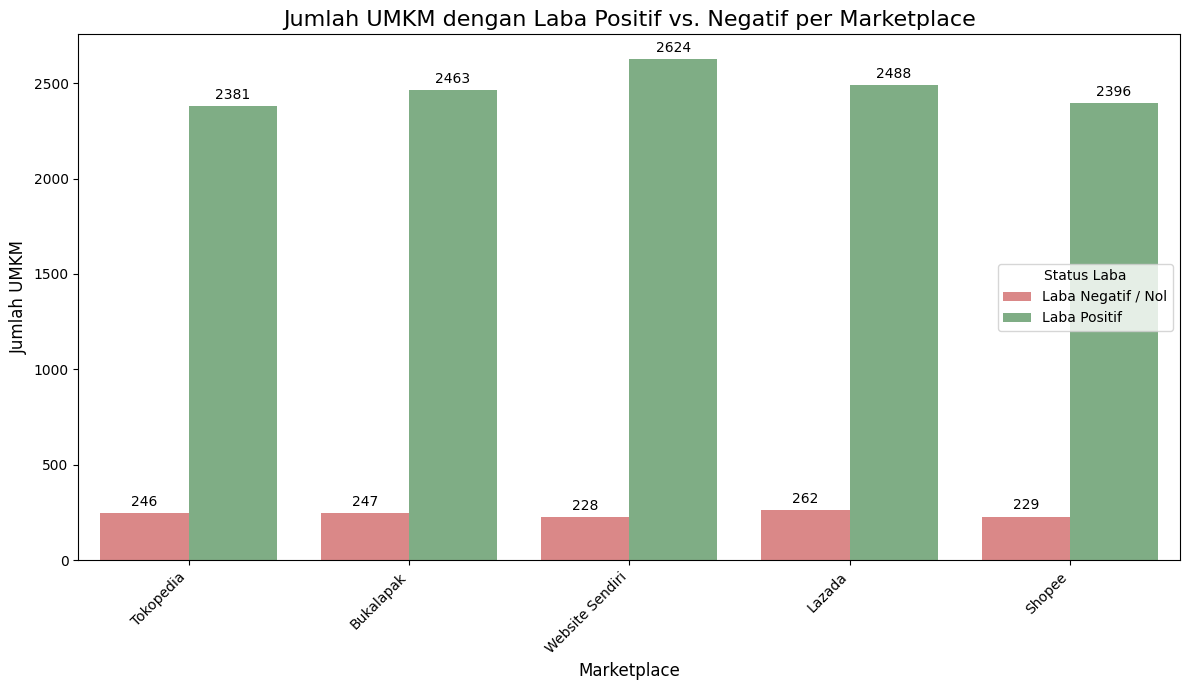

In [38]:
if 'marketplace' in df.columns and 'status_laba' in df.columns:
    plt.figure(figsize=(12, 7))

    # Membuat plot dengan x='marketplace' dan dibedakan warnanya (hue) oleh 'status_laba'
    ax = sns.countplot(
        data=df,
        x='marketplace',
        hue='status_laba',
        palette={'Laba Positif': '#77B57F', 'Laba Negatif / Nol': '#E87A7A'} # Hijau & Merah kalem
    )

    # Menambahkan label jumlah di atas setiap bar
    for c in ax.containers:
        ax.bar_label(c, label_type='edge', padding=3)

    plt.title('Jumlah UMKM dengan Laba Positif vs. Negatif per Marketplace', fontsize=16)
    plt.xlabel('Marketplace', fontsize=12)
    plt.ylabel('Jumlah UMKM', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Status Laba')
    plt.tight_layout()
    plt.show()

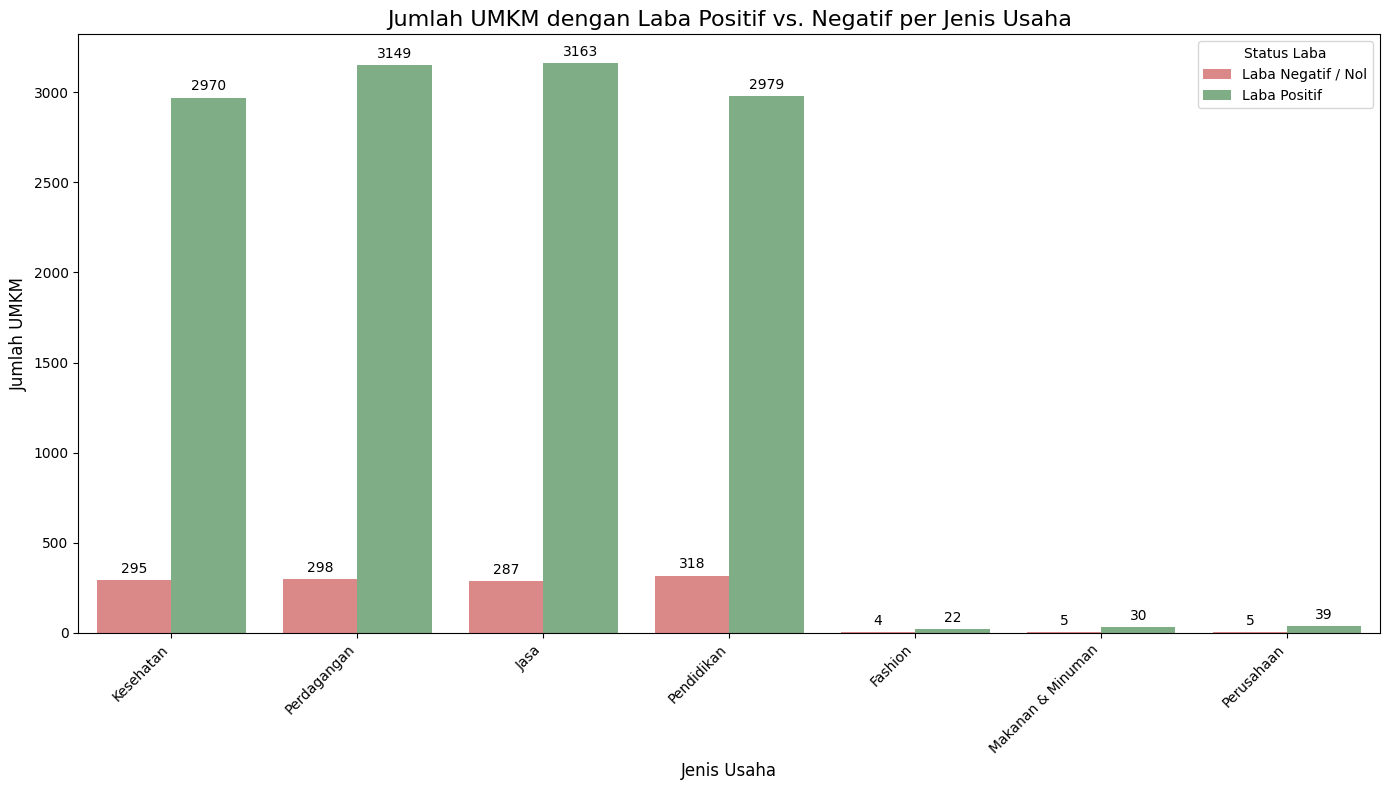

In [39]:
if 'jenis_usaha' in df.columns and 'status_laba' in df.columns:
    plt.figure(figsize=(14, 8)) # Mungkin butuh ukuran lebih besar jika banyak jenis usaha

    ax = sns.countplot(
        data=df,
        x='jenis_usaha',
        hue='status_laba',
        palette={'Laba Positif': '#77B57F', 'Laba Negatif / Nol': '#E87A7A'}
    )

    # Menambahkan label jumlah di atas setiap bar
    for c in ax.containers:
        ax.bar_label(c, label_type='edge', padding=3)

    plt.title('Jumlah UMKM dengan Laba Positif vs. Negatif per Jenis Usaha', fontsize=16)
    plt.xlabel('Jenis Usaha', fontsize=12)
    plt.ylabel('Jumlah UMKM', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Status Laba')
    plt.tight_layout()
    plt.show()

### Data Kategorik

#### Jenis Usaha

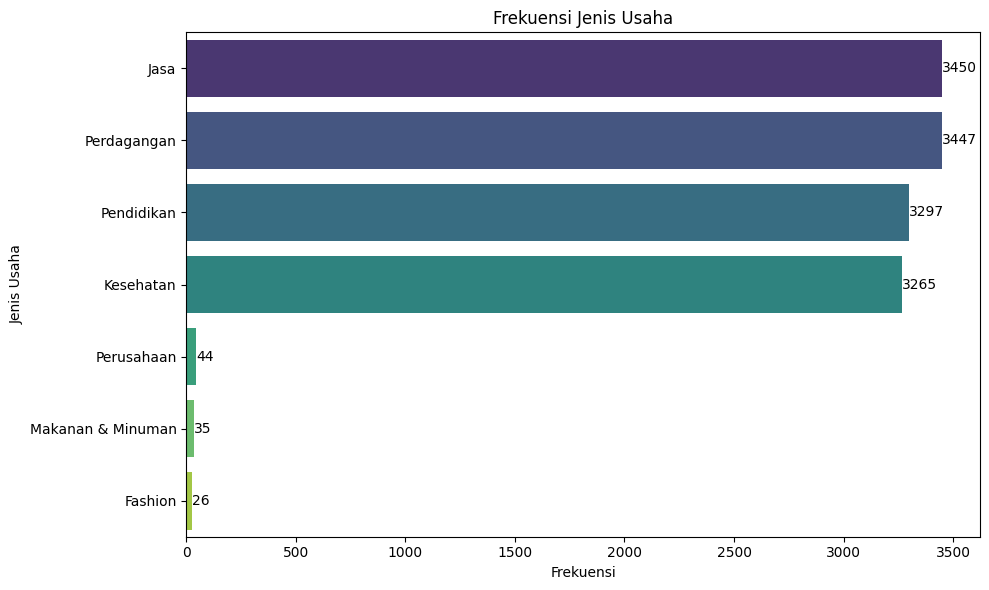

In [40]:
import matplotlib.pyplot as plt
# Visualisasi frekuensi jenis usaha
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='jenis_usaha', order=df['jenis_usaha'].value_counts().index, palette='viridis')
plt.title('Frekuensi Jenis Usaha')
plt.xlabel('Frekuensi')
plt.ylabel('Jenis Usaha')

# Menambahkan nilai frekuensi pada bar
ax = plt.gca()
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height()/2.,
            f'{int(width)}',
            ha='left', va='center')

plt.tight_layout()
plt.show()

#### Marketplace

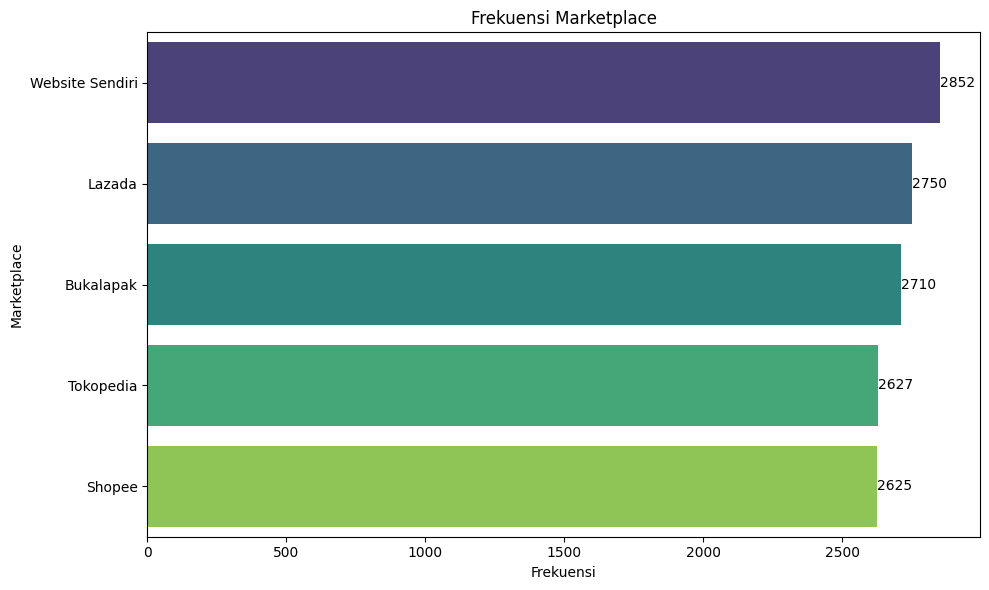

In [41]:
import matplotlib.pyplot as plt
# Visualisasi frekuensi marketplace
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='marketplace', order=df['marketplace'].value_counts().index, palette='viridis')
plt.title('Frekuensi Marketplace')
plt.xlabel('Frekuensi')
plt.ylabel('Marketplace')

# Menambahkan nilai frekuensi pada bar
ax = plt.gca()
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height()/2.,
            f'{int(width)}',
            ha='left', va='center')

plt.tight_layout()
plt.show()

#### Status Legalitas

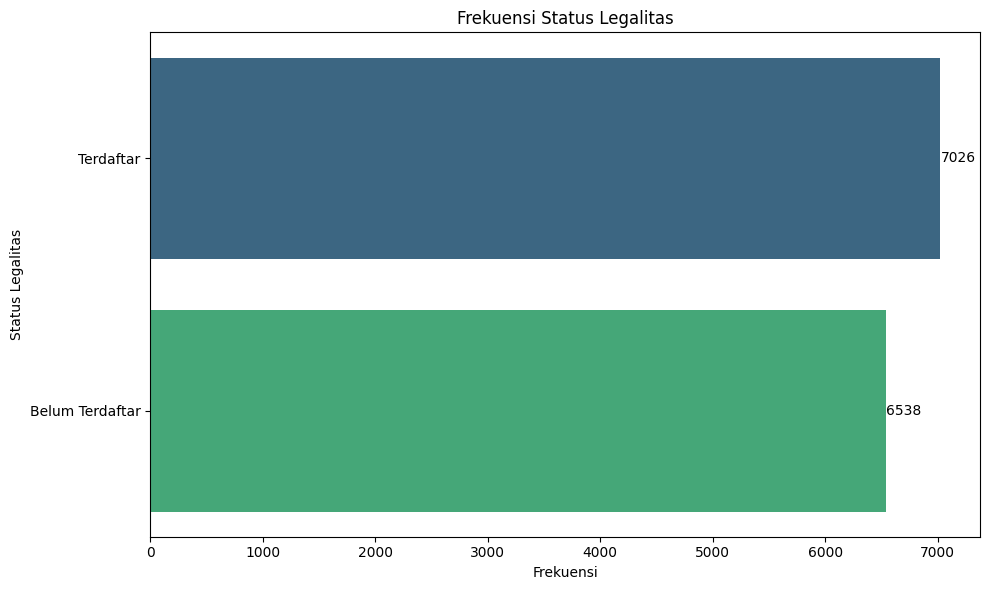

In [42]:
import matplotlib.pyplot as plt
# Visualisasi frekuensi status legalitas
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='status_legalitas', order=df['status_legalitas'].value_counts().index, palette='viridis')
plt.title('Frekuensi Status Legalitas')
plt.xlabel('Frekuensi')
plt.ylabel('Status Legalitas')

# Menambahkan nilai frekuensi pada bar
ax = plt.gca()
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height()/2.,
            f'{int(width)}',
            ha='left', va='center')

plt.tight_layout()
plt.show()

Urutan kolom di df_pivot (untuk pencocokan warna):
Index(['Belum Terdaftar', 'Terdaftar'], dtype='object', name='status_legalitas')


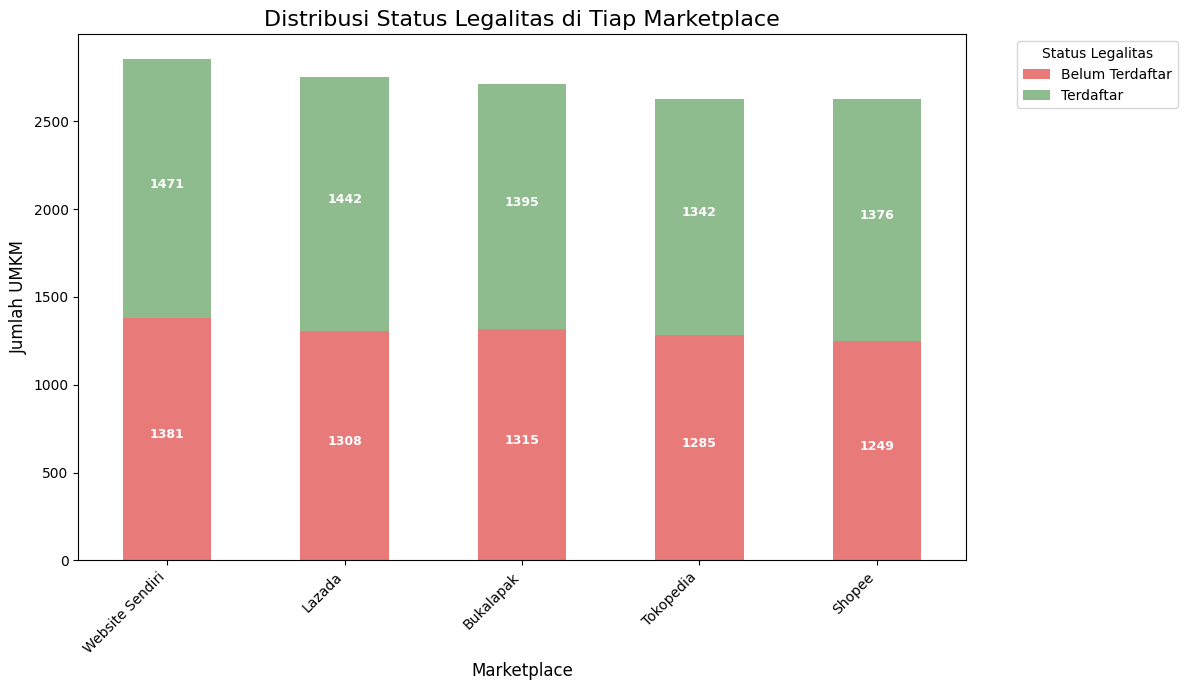

In [43]:
# Buat DataFrame hitungan gabungan
df_grouped = df.groupby(['marketplace', 'status_legalitas']).size().reset_index(name='jumlah')

# Pivot tabel untuk format stacked bar
df_pivot = df_grouped.pivot(index='marketplace', columns='status_legalitas', values='jumlah').fillna(0)

# Urutkan berdasarkan total (opsional)
df_pivot['Total'] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values('Total', ascending=False)
df_pivot = df_pivot.drop('Total', axis=1)

# --- MODIFIKASI WARNA DI SINI ---
warna_merah_kalem = '#E87A7A'
warna_ijo_kalem = '#8FBC8F'
print("Urutan kolom di df_pivot (untuk pencocokan warna):")
print(df_pivot.columns)
colors_custom = [warna_merah_kalem, warna_ijo_kalem]

# Visualisasi dengan stacked bar chart (tegak)
ax = df_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    color=colors_custom
)

plt.title('Distribusi Status Legalitas di Tiap Marketplace', fontsize=16)
plt.xlabel('Marketplace', fontsize=12)
plt.ylabel('Jumlah UMKM', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status Legalitas', bbox_to_anchor=(1.05, 1), loc='upper left')

for c in ax.containers:
    labels = [f'{int(v.get_height())}' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', padding=3, color='white', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

Urutan kolom di df_pivot (untuk pencocokan warna):
Index(['Belum Terdaftar', 'Terdaftar'], dtype='object', name='status_legalitas')


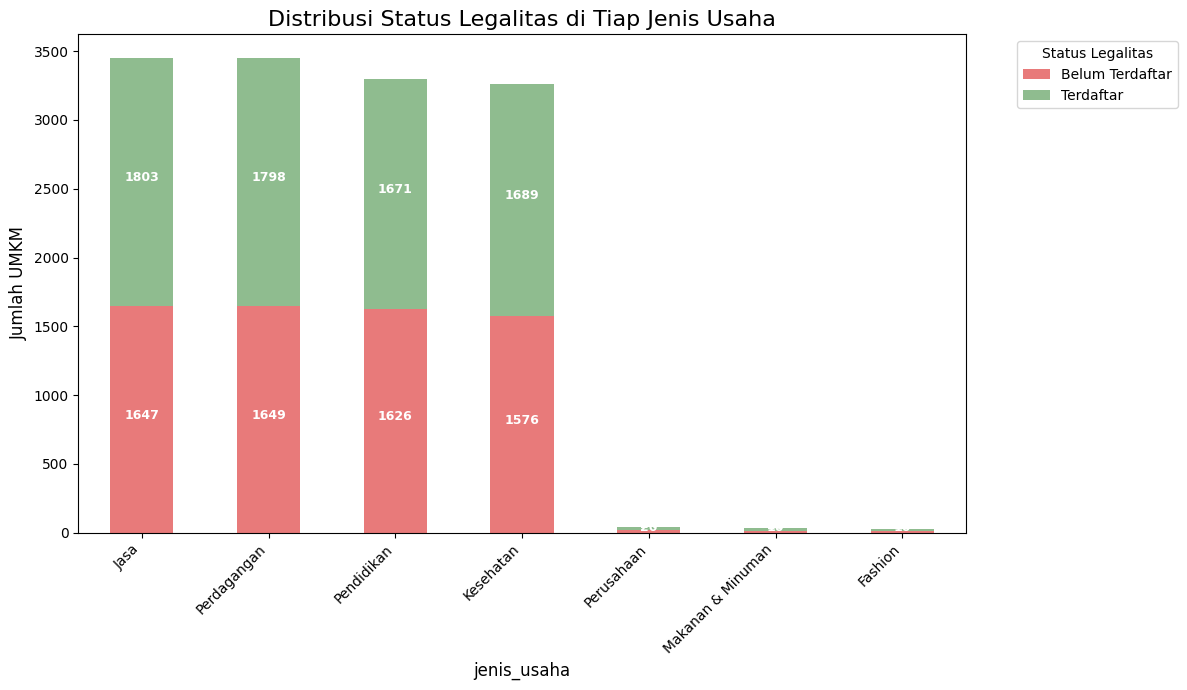

In [44]:
# Buat DataFrame hitungan gabungan
df_grouped = df.groupby(['jenis_usaha', 'status_legalitas']).size().reset_index(name='jumlah')

# Pivot tabel untuk format stacked bar
df_pivot = df_grouped.pivot(index='jenis_usaha', columns='status_legalitas', values='jumlah').fillna(0)

# Urutkan berdasarkan total (opsional)
df_pivot['Total'] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values('Total', ascending=False)
df_pivot = df_pivot.drop('Total', axis=1)

# --- MODIFIKASI WARNA DI SINI ---
warna_merah_kalem = '#E87A7A'
warna_ijo_kalem = '#8FBC8F'
print("Urutan kolom di df_pivot (untuk pencocokan warna):")
print(df_pivot.columns)

colors_custom = [warna_merah_kalem, warna_ijo_kalem]

# Visualisasi dengan stacked bar chart (tegak)
ax = df_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    color=colors_custom
)

plt.title('Distribusi Status Legalitas di Tiap Jenis Usaha', fontsize=16)
plt.xlabel('jenis_usaha', fontsize=12)
plt.ylabel('Jumlah UMKM', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status Legalitas', bbox_to_anchor=(1.05, 1), loc='upper left')


for c in ax.containers:
    labels = [f'{int(v.get_height())}' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', padding=3, color='white', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

## CLUSTERING

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_umkm                 13564 non-null  float64
 1   nama_usaha              13564 non-null  object 
 2   jenis_usaha             13564 non-null  object 
 3   tenaga_kerja_perempuan  13564 non-null  int64  
 4   tenaga_kerja_laki_laki  13564 non-null  int64  
 5   aset                    13564 non-null  float64
 6   omset                   13564 non-null  float64
 7   marketplace             13564 non-null  object 
 8   kapasitas_produksi      13564 non-null  int64  
 9   status_legalitas        13564 non-null  object 
 10  tahun_berdiri           13564 non-null  int64  
 11  laba                    13564 non-null  float64
 12  biaya_karyawan          13564 non-null  float64
 13  jumlah_pelanggan        13564 non-null  int64  
 14  laba_negatif            13564 non-null

In [46]:
# Pastikan fitur-fitur ini ada di DataFrame Anda dan sudah bersih dari NaN
numerical_features_for_clustering = [
    'profit_margin',
    'roa',
    'asset_turnover',
    'total_tenaga_kerja',
    'jumlah_pelanggan',
    'kapasitas_produksi',
    'usia_usaha',
    'omset',
    'laba'

    # Anda bisa menambahkan 'usia_usaha' jika sudah membuatnya dari 'tahun_berdiri'
]

# Filter hanya fitur yang benar-benar ada di DataFrame
existing_features = [f for f in numerical_features_for_clustering if f in df.columns]

# Pastikan tidak ada NaN di fitur yang dipilih
df_cluster_input = df[existing_features].copy()

# Simpan indeks asli untuk menggabungkan label cluster nanti
original_indices = df_cluster_input.index

if df_cluster_input.isnull().values.any():
    print("Peringatan: Masih ada nilai NaN pada fitur yang dipilih untuk clustering. Mengisi dengan median fitur.")
    for col in df_cluster_input.columns[df_cluster_input.isnull().any()]:
        df_cluster_input[col].fillna(df_cluster_input[col].median(), inplace=True)

print(f"\nFitur yang digunakan untuk clustering: {df_cluster_input.columns.tolist()}")
print(f"Jumlah data yang akan di-cluster: {len(df_cluster_input)}")


Fitur yang digunakan untuk clustering: ['profit_margin', 'roa', 'asset_turnover', 'total_tenaga_kerja', 'jumlah_pelanggan', 'kapasitas_produksi', 'usia_usaha', 'omset', 'laba']
Jumlah data yang akan di-cluster: 13564



Data setelah scaling (5 baris pertama sampel):
[[-1.65249839 -0.72482016 -0.72482017 -0.98760668 -0.07242791 -0.07242791
  -0.39043918 -1.56305166 -1.54948714]
 [ 0.32415207 -0.26161815 -0.26161814 -1.18136366 -0.12494983 -0.12494983
  -0.25384438  1.0148444   0.84382475]
 [ 0.09811218 -0.50891825 -0.50891825  0.6593276  -0.40856824 -0.40856824
   1.65848284 -0.02106967 -0.2728282 ]
 [-0.05235256 -0.57478507 -0.57478506 -0.09148068  1.7028132   1.7028132
   1.24869844 -0.34156324 -0.63453308]
 [-2.08617993 -0.73440956 -0.73440956  1.26481814 -0.6501691  -0.6501691
   1.38529324 -1.45936273 -1.72089588]]


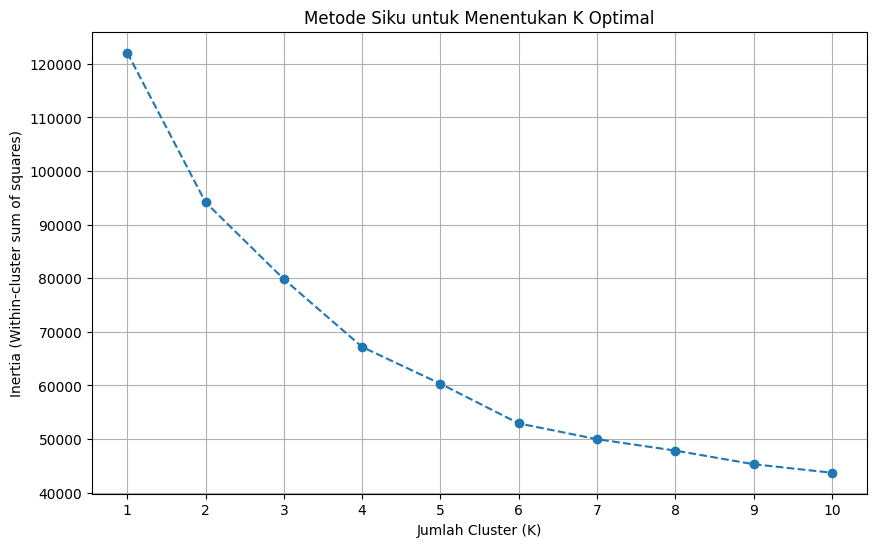

In [47]:
if len(df_cluster_input) < 2: # Membutuhkan setidaknya 2 sampel untuk clustering
    print("Tidak cukup data untuk melakukan clustering setelah pembersihan.")
else:
    # --- 2. Scaling Fitur ---
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_cluster_input)
    print("\nData setelah scaling (5 baris pertama sampel):")
    print(X_scaled[:5])

    # --- 3. Menentukan Jumlah Cluster Optimal (K) ---
    inertia = []
    k_range = range(1, min(11, len(X_scaled))) # Coba K dari 1 hingga 10 (atau jumlah sampel jika kurang)

    for k_elbow in k_range:
        if k_elbow == 0: continue # KMeans butuh n_clusters >= 1, tapi elbow plot mulai dari 1, silhouette dari 2
        kmeans_elbow = KMeans(n_clusters=k_elbow, init='k-means++', random_state=42, n_init='auto')
        kmeans_elbow.fit(X_scaled)
        inertia.append(kmeans_elbow.inertia_)

    if inertia: # Hanya plot jika ada data inertia
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertia, marker='o', linestyle='--')
        plt.title('Metode Siku untuk Menentukan K Optimal')
        plt.xlabel('Jumlah Cluster (K)')
        plt.ylabel('Inertia (Within-cluster sum of squares)')
        plt.xticks(list(k_range))
        plt.grid(True)
        plt.show()
    else:
        print("Tidak dapat membuat plot Elbow (mungkin karena k_range kosong).")

Untuk K=2, Rata-rata Silhouette Score: 0.2130
Untuk K=3, Rata-rata Silhouette Score: 0.2153
Untuk K=4, Rata-rata Silhouette Score: 0.2070
Untuk K=5, Rata-rata Silhouette Score: 0.1986
Untuk K=6, Rata-rata Silhouette Score: 0.2044
Untuk K=7, Rata-rata Silhouette Score: 0.1948
Untuk K=8, Rata-rata Silhouette Score: 0.1808
Untuk K=9, Rata-rata Silhouette Score: 0.1780
Untuk K=10, Rata-rata Silhouette Score: 0.1747


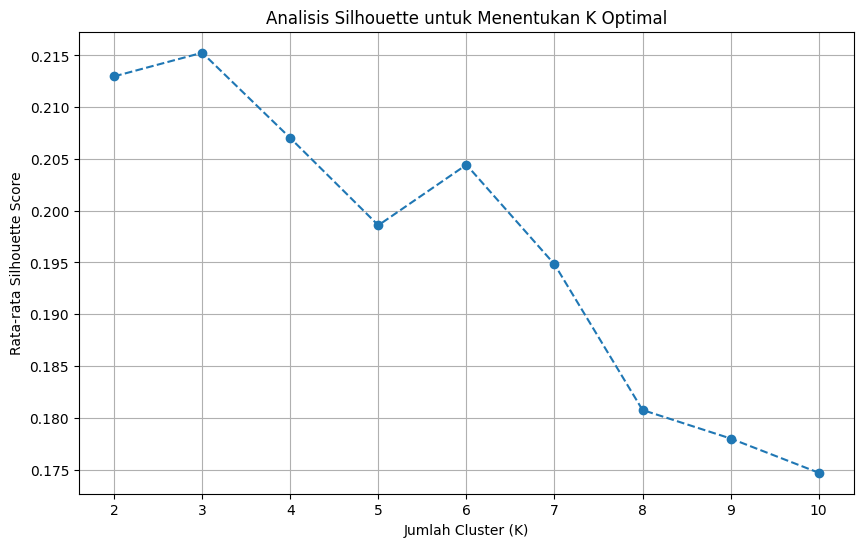


Berdasarkan Analisis Silhouette, K optimal yang disarankan: 3 (Score: 0.2153)

Jumlah K yang akan digunakan untuk clustering final: 3


In [48]:
    # b. Analisis Silhouette (Lebih direkomendasikan)
    silhouette_scores = []
    # K untuk Silhouette dimulai dari 2, hingga jumlah sampel - 1 (atau maks 10)
    k_range_silhouette = range(2, min(11, len(X_scaled)))

    for k_sil in k_range_silhouette:
        if len(X_scaled) <= k_sil : # Tidak bisa cluster jika K >= sampel
            print(f"Skipping K={k_sil} untuk Silhouette, K >= jumlah sampel.")
            continue
        kmeans_sil = KMeans(n_clusters=k_sil, init='k-means++', random_state=42, n_init='auto')
        cluster_labels_sil = kmeans_sil.fit_predict(X_scaled)
        try:
            silhouette_avg = silhouette_score(X_scaled, cluster_labels_sil)
            silhouette_scores.append(silhouette_avg)
            print(f"Untuk K={k_sil}, Rata-rata Silhouette Score: {silhouette_avg:.4f}")
        except ValueError as e_sil: # Jika hanya 1 cluster terbentuk karena data sangat sedikit
            print(f"Error menghitung Silhouette untuk K={k_sil}: {e_sil}. Mungkin hanya 1 cluster terbentuk.")
            silhouette_scores.append(-1) # Skor buruk jika error


    if silhouette_scores: # Hanya plot jika ada skor
        plt.figure(figsize=(10, 6))
        plt.plot(k_range_silhouette, silhouette_scores, marker='o', linestyle='--')
        plt.title('Analisis Silhouette untuk Menentukan K Optimal')
        plt.xlabel('Jumlah Cluster (K)')
        plt.ylabel('Rata-rata Silhouette Score')
        plt.xticks(list(k_range_silhouette))
        plt.grid(True)
        plt.show()

        # Pilih K dengan Silhouette Score tertinggi
        if silhouette_scores:
            optimal_k_silhouette = k_range_silhouette[np.argmax(silhouette_scores)]
            print(f"\nBerdasarkan Analisis Silhouette, K optimal yang disarankan: {optimal_k_silhouette} (Score: {max(silhouette_scores):.4f})")
        else: # Jika silhouette_scores kosong (misal karena hanya 1 sampel)
            optimal_k_silhouette = 3 # Default jika tidak ada hasil silhouette
            print("Tidak dapat menentukan K optimal dari Silhouette, menggunakan K=3 sebagai default.")

    else:
        optimal_k_silhouette = 3 # Default jika tidak ada hasil silhouette sama sekali
        print("Tidak dapat melakukan Analisis Silhouette (mungkin karena data terlalu sedikit), menggunakan K=3 sebagai default.")

    # GANTI NILAI K_FINAL INI BERDASARKAN HASIL ANALISIS ANDA (Elbow dan Silhouette)
    K_FINAL = optimal_k_silhouette if 'optimal_k_silhouette' in locals() and optimal_k_silhouette >=2 else 3
    print(f"\nJumlah K yang akan digunakan untuk clustering final: {K_FINAL}")

    if len(X_scaled) < K_FINAL:
        print(f"Peringatan: Jumlah sampel ({len(X_scaled)}) lebih kecil dari K_FINAL ({K_FINAL}). Mengatur K_FINAL menjadi {max(1, len(X_scaled)-1 if len(X_scaled)>1 else 1 )}.")
        K_FINAL = max(1, len(X_scaled)-1 if len(X_scaled)>1 else 1 )
        if K_FINAL == 0 and len(X_scaled) == 1: K_FINAL = 1 # Jika hanya 1 sampel, 1 cluster

In [49]:
    # --- 4. Melatih Model K-Means ---
    if K_FINAL > 0 : # Hanya jalankan jika K_FINAL valid
        kmeans = KMeans(n_clusters=K_FINAL, init='k-means++', random_state=42, n_init='auto')
        cluster_labels = kmeans.fit_predict(X_scaled)

        # --- 5. Menambahkan Label Cluster ke Data Asli ---
        df_clustered_output = df.loc[original_indices].copy()
        df_clustered_output['Cluster'] = cluster_labels

        print("\nData dengan Label Cluster (5 baris pertama):")
df_clustered_output.head() # Ganti dengan df jika sesuai


Data dengan Label Cluster (5 baris pertama):


,id_umkm,nama_usaha,jenis_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,marketplace,kapasitas_produksi,status_legalitas,...,jumlah_pelanggan,laba_negatif,omset_bin_temp,total_tenaga_kerja,usia_usaha,profit_margin,roa,asset_turnover,status_laba,Cluster
0,28828567.0,UD. Alif Pamungkas,Kesehatan,1,56,5497149.0,3347794.0,Tokopedia,479,Belum Terdaftar,...,479,1,Rendah,57,10,-0.642021,-0.390994,0.609005,Laba Negatif / Nol,0
1,28828568.0,UD. Zidanar Panji,Perdagangan,5,44,7398384.0,39969661.0,Bukalapak,464,Terdaftar,...,464,0,Tinggi,49,11,0.814900,4.402485,5.402485,Laba Positif,1
2,28828569.0,UD. Winda Jayengprana,Jasa,74,51,8881762.0,25253355.0,Website Sendiri,383,Belum Terdaftar,...,383,0,Sedang,125,25,0.648294,1.843282,2.843282,Laba Positif,0
3,28828570.0,UD. Damaris Satria,Jasa,89,5,9576178.0,20700389.0,Website Sendiri,986,Belum Terdaftar,...,986,0,Sedang,94,22,0.537391,1.161654,2.161654,Laba Positif,0
4,28828571.0,UD. Qasya Wiratama,Jasa,91,59,9456853.0,4820810.0,Lazada,314,Belum Terdaftar,...,314,1,Rendah,150,23,-0.961673,-0.490231,0.509769,Laba Negatif / Nol,0



--- Karakteristik Rata-rata Fitur Numerik per Cluster (K=3) ---
         profit_margin        roa  asset_turnover  total_tenaga_kerja  \
Cluster                                                                 
0             0.194045   1.760593        2.760593           97.588956   
1             0.846913   7.565493        8.565492           97.869370   
2             0.972395  39.346945       40.346944           98.302083   

         jumlah_pelanggan  kapasitas_produksi  usia_usaha         omset  \
Cluster                                                                   
0              498.930802          498.930802   12.714064  1.174133e+07   
1              502.715134          502.715134   12.979580  3.551975e+07   
2              480.527778          480.527778   12.857639  3.853193e+07   

                 laba  
Cluster                
0        6.048577e+06  
1        3.016877e+07  
2        3.748145e+07  


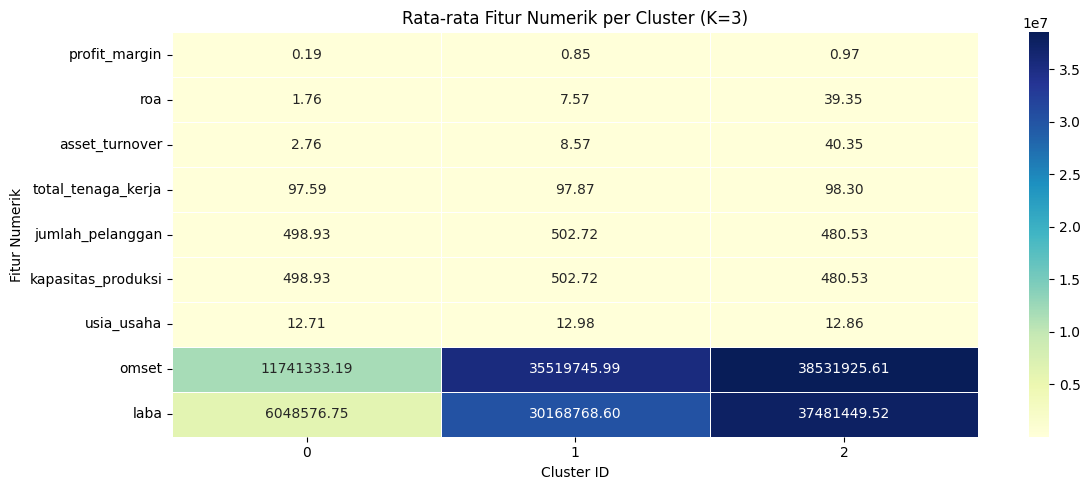

In [50]:
        # --- 6. Analisis Karakteristik Cluster ---
        # a. Rata-rata Fitur Numerik per Cluster
        print(f"\n--- Karakteristik Rata-rata Fitur Numerik per Cluster (K={K_FINAL}) ---")
        # Menggunakan df_clustered_output yang memiliki fitur asli (sebelum scaling) dan label cluster
        cluster_characteristics_numeric = df_clustered_output.groupby('Cluster')[existing_features].mean()
        print(cluster_characteristics_numeric)

        # Visualisasi karakteristik numerik (misal dengan heatmap atau bar chart)
        plt.figure(figsize=(12, max(5, K_FINAL * 1.5) )) # Sesuaikan tinggi berdasarkan jumlah cluster
        sns.heatmap(cluster_characteristics_numeric.T, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
        # Transpose .T agar fitur jadi baris dan cluster jadi kolom untuk heatmap yang lebih mudah dibaca
        plt.title(f'Rata-rata Fitur Numerik per Cluster (K={K_FINAL})')
        plt.ylabel('Fitur Numerik')
        plt.xlabel('Cluster ID')
        plt.xticks(rotation=0)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()


--- Distribusi Fitur Kategorikal per Cluster (K=3) ---

Distribusi 'jenis_usaha' per Cluster:
jenis_usaha  Fashion  Jasa  Kesehatan  Makanan & Minuman  Pendidikan  \
Cluster                                                                
0                 15  1458       1401                 15        1457   
1                  8  1770       1642                 18        1636   
2                  3   222        222                  2         204   

jenis_usaha  Perdagangan  Perusahaan  
Cluster                               
0                   1433          16  
1                   1807          24  
2                    207           4  

Proporsi 'jenis_usaha' per Cluster (%):
jenis_usaha  Fashion  Jasa  Kesehatan  Makanan & Minuman  Pendidikan  \
Cluster                                                                
0                0.3  25.2       24.2                0.3        25.1   
1                0.1  25.6       23.8                0.3        23.7   
2                0.3

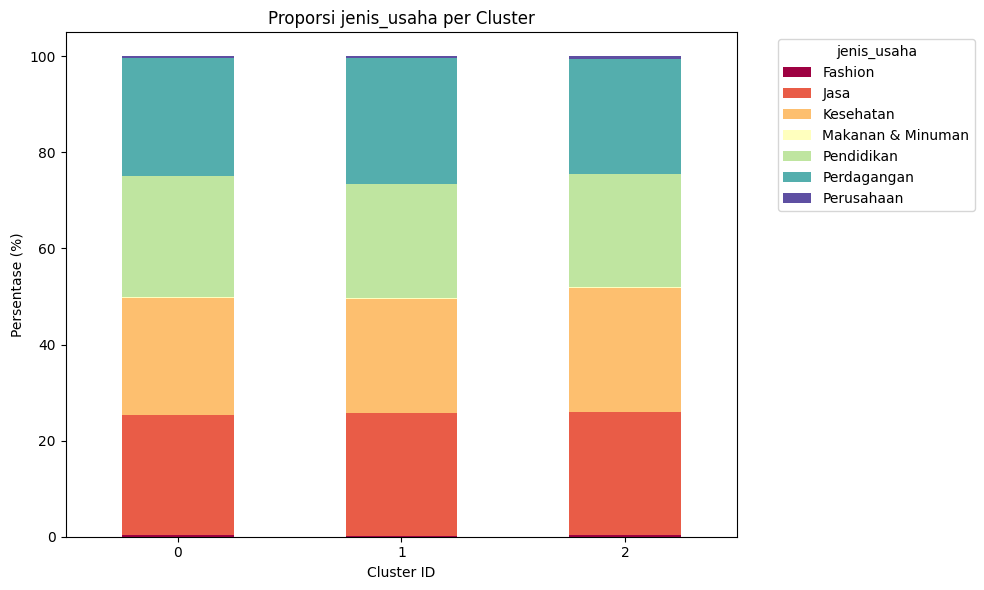


Distribusi 'marketplace' per Cluster:
marketplace  Bukalapak  Lazada  Shopee  Tokopedia  Website Sendiri
Cluster                                                           
0                 1126    1226    1125       1139             1179
1                 1415    1349    1344       1309             1488
2                  169     175     156        179              185

Proporsi 'marketplace' per Cluster (%):
marketplace  Bukalapak  Lazada  Shopee  Tokopedia  Website Sendiri
Cluster                                                           
0                 19.4    21.2    19.4       19.7             20.3
1                 20.5    19.5    19.5       19.0             21.5
2                 19.6    20.3    18.1       20.7             21.4


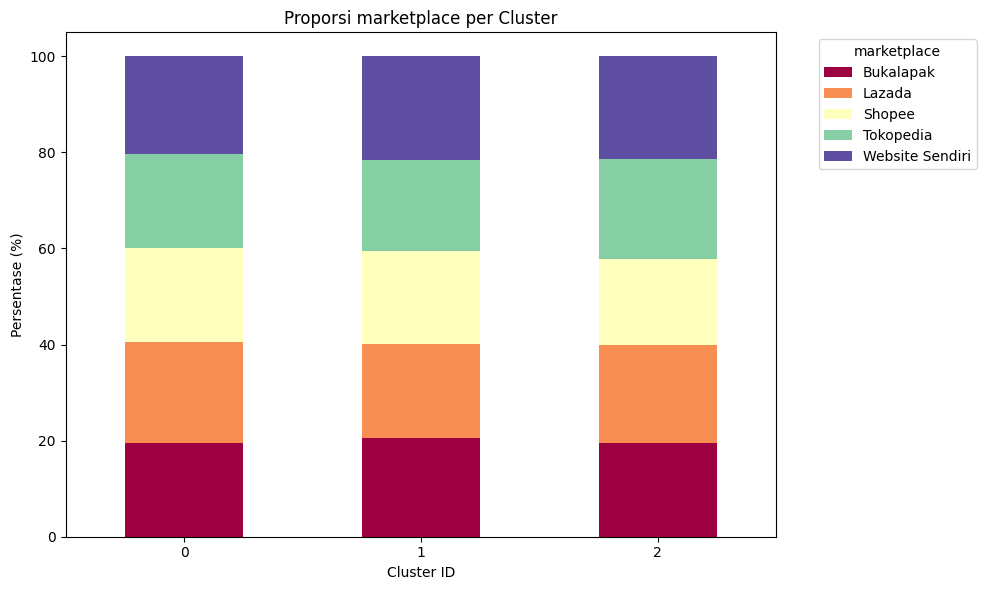


Distribusi 'status_legalitas' per Cluster:
status_legalitas  Belum Terdaftar  Terdaftar
Cluster                                     
0                            2738       3057
1                            3385       3520
2                             415        449

Proporsi 'status_legalitas' per Cluster (%):
status_legalitas  Belum Terdaftar  Terdaftar
Cluster                                     
0                            47.2       52.8
1                            49.0       51.0
2                            48.0       52.0


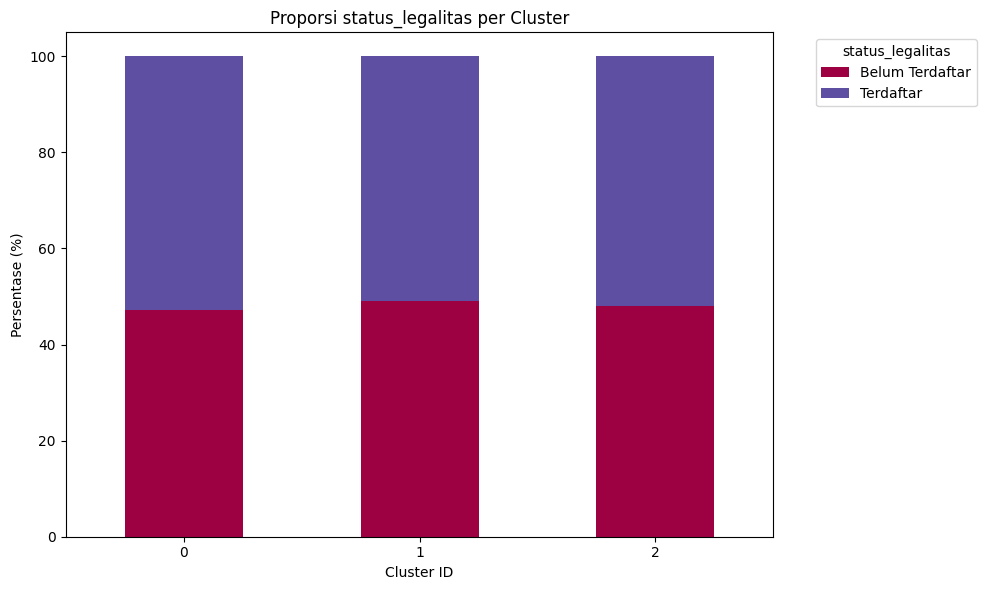

In [51]:
        # b. Distribusi Fitur Kategorikal per Cluster
        categorical_cols_for_profile = ['jenis_usaha', 'marketplace', 'status_legalitas']
        print(f"\n--- Distribusi Fitur Kategorikal per Cluster (K={K_FINAL}) ---")
        for col_cat in categorical_cols_for_profile:
            if col_cat in df_clustered_output.columns:
                print(f"\nDistribusi '{col_cat}' per Cluster:")
                # Crosstab untuk melihat frekuensi
                crosstab_cat = pd.crosstab(df_clustered_output['Cluster'], df_clustered_output[col_cat])
                print(crosstab_cat)

                # Normalisasi untuk melihat proporsi
                crosstab_cat_norm = pd.crosstab(df_clustered_output['Cluster'], df_clustered_output[col_cat], normalize='index') * 100
                print(f"\nProporsi '{col_cat}' per Cluster (%):")
                print(crosstab_cat_norm.round(1))

                # Visualisasi proporsi (opsional)
                crosstab_cat_norm.plot(kind='bar', stacked=True, figsize=(10, K_FINAL + 3), colormap='Spectral')
                plt.title(f'Proporsi {col_cat} per Cluster')
                plt.ylabel('Persentase (%)')
                plt.xlabel('Cluster ID')
                plt.xticks(rotation=0)
                plt.legend(title=col_cat, bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.tight_layout()
                plt.show()
            else:
                print(f"Kolom '{col_cat}' tidak ditemukan untuk analisis profil.")

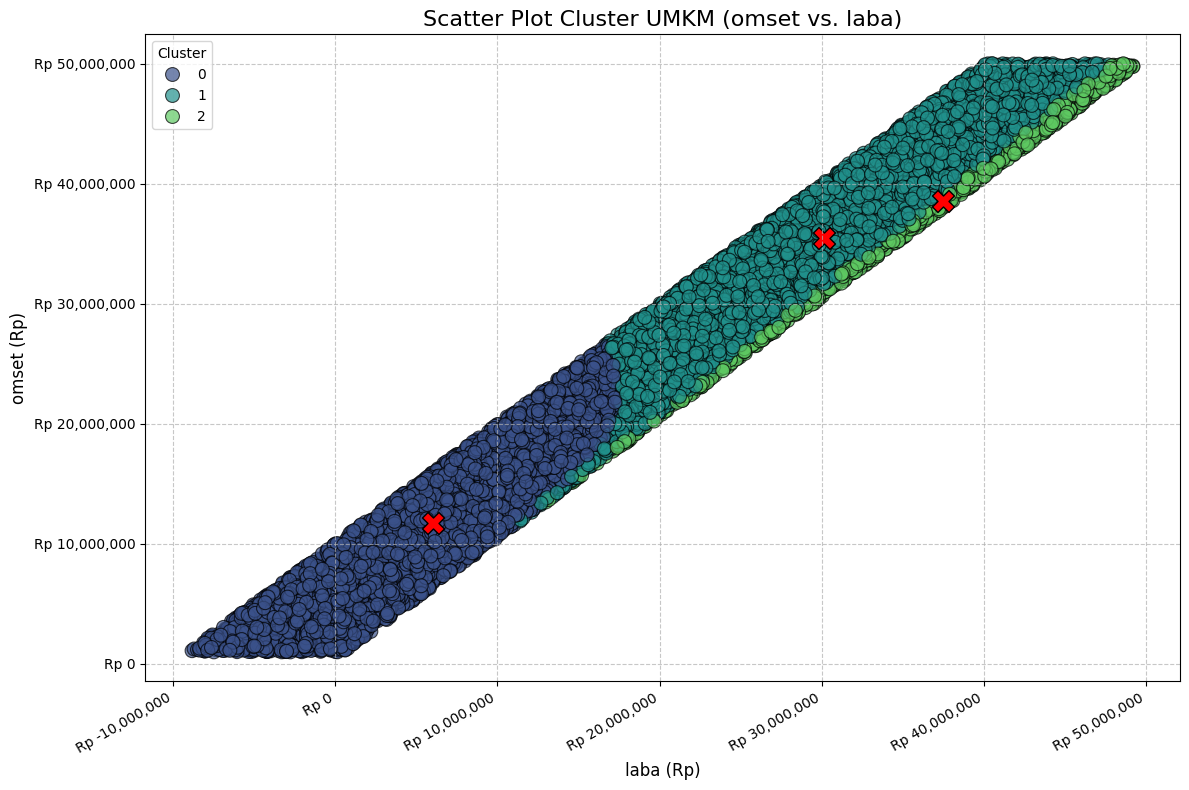

In [52]:

feature_x = 'laba'
feature_y = 'omset'

# Pastikan fitur yang dipilih ada di DataFrame dan merupakan bagian dari fitur clustering
if feature_x in existing_features and feature_y in existing_features and \
   feature_x in df_clustered_output.columns and feature_y in df_clustered_output.columns and \
   'Cluster' in df_clustered_output.columns:

    plt.figure(figsize=(12, 8))

    n_clusters_plot = df_clustered_output['Cluster'].nunique()
    palette_plot = sns.color_palette("viridis", n_colors=n_clusters_plot)

    sns.scatterplot(
        data=df_clustered_output,
        x=feature_x,
        y=feature_y,
        hue='Cluster',
        palette=palette_plot,
        s=100,
        alpha=0.7,
        edgecolor='k'
    )

    if 'kmeans' in locals() and 'scaler' in locals() and 'existing_features' in locals():
        try:
            centroids_scaled = kmeans.cluster_centers_
            centroids_original_scale = scaler.inverse_transform(centroids_scaled)

            df_centroids = pd.DataFrame(centroids_original_scale, columns=existing_features)

            plt.scatter(
                df_centroids[feature_x],
                df_centroids[feature_y],
                marker='X',
                s=250,
                color='red',
                edgecolor='black',
                label='Centroids'
            )
            # Cek apakah label 'Centroids' sudah ada di legenda untuk menghindari duplikasi
            handles, labels = plt.gca().get_legend_handles_labels()
            if 'Centroids' not in labels:
                 plt.legend()
            else:
                pass


        except Exception as e:
            print(f"Tidak dapat memplot centroid: {e}")
            print("Pastikan model 'kmeans', 'scaler', dan 'existing_features' (dengan urutan kolom yang benar) tersedia.")

    plt.title(f'Scatter Plot Cluster UMKM ({feature_y} vs. {feature_x})', fontsize=16)
    plt.xlabel(f'{feature_x} (Rp)', fontsize=12)
    plt.ylabel(f'{feature_y} (Rp)', fontsize=12)

    # Format sumbu sebagai Rupiah
    formatter = plt.FuncFormatter(lambda x_val, pos: f'Rp {x_val:,.0f}')
    if pd.api.types.is_numeric_dtype(df_clustered_output[feature_x]):
        plt.gca().xaxis.set_major_formatter(formatter)
    if pd.api.types.is_numeric_dtype(df_clustered_output[feature_y]):
        plt.gca().yaxis.set_major_formatter(formatter)

    plt.xticks(rotation=30, ha='right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print(f"Pastikan kolom '{feature_x}', '{feature_y}', dan 'Cluster' ada di DataFrame 'df_clustered_output'.")
    print(f"Fitur yang digunakan untuk clustering (existing_features): {existing_features if 'existing_features' in locals() else 'Belum terdefinisi'}")
    print(f"Kolom yang tersedia di df_clustered_output: {df_clustered_output.columns.tolist() if 'df_clustered_output' in locals() else 'Belum terdefinisi'}")

In [53]:
# prompt: output berupa csv 'dataset_clustered' dengan tambahan kolom cluster dengan isian per baris masuk kluster mana

df_clustered_output.to_csv('dataset_clustered.csv', index=False)
print("\nDataFrame 'df_clustered_output' berhasil disimpan sebagai 'dataset_clustered.csv' dengan label cluster.")


DataFrame 'df_clustered_output' berhasil disimpan sebagai 'dataset_clustered.csv' dengan label cluster.


In [54]:
# --- 1. Evaluasi Cluster Menggunakan Metrik ---

print("\n--- Evaluasi Cluster Menggunakan Metrik ---")

# a. Silhouette Score (Sudah dihitung saat mencari K optimal, tapi dihitung ulang untuk K_FINAL)
if K_FINAL > 1 and len(np.unique(cluster_labels)) > 1 and len(X_scaled) > K_FINAL:
    try:
        silhouette_final = silhouette_score(X_scaled, cluster_labels)
        print(f"Silhouette Score untuk K={K_FINAL}: {silhouette_final:.4f}")
        print("Interpretasi Silhouette Score:")
        print("- Skor mendekati +1: Objek jauh dari cluster tetangga (clustering baik).")
        print("- Skor mendekati 0: Objek sangat dekat dengan batas decision antara dua cluster (clustering buruk).")
        print("- Skor mendekati -1: Objek mungkin salah diberikan ke cluster yang salah.")
    except ValueError as e_sil_final:
        print(f"Tidak dapat menghitung Silhouette Score untuk K={K_FINAL}: {e_sil_final}")
else:
    print(f"Tidak dapat menghitung Silhouette Score untuk K={K_FINAL} (K harus > 1, jumlah label unik > 1, dan sampel > K).")

# b. Davies-Bouldin Index
if K_FINAL > 1 and len(np.unique(cluster_labels)) > 1 and len(X_scaled) > K_FINAL:
    try:
        davies_bouldin_final = davies_bouldin_score(X_scaled, cluster_labels)
        print(f"Davies-Bouldin Index untuk K={K_FINAL}: {davies_bouldin_final:.4f}")
        print("Interpretasi Davies-Bouldin Index:")
        print("- Skor yang lebih rendah menunjukkan pemisahan yang lebih baik antara cluster.")
        print("- Skor nol adalah nilai terendah yang mungkin (clustering sempurna).")
    except ValueError as e_db:
         print(f"Tidak dapat menghitung Davies-Bouldin Index untuk K={K_FINAL}: {e_db}")
    except Exception as e_db_other:
         print(f"Error lain saat menghitung Davies-Bouldin Index untuk K={K_FINAL}: {e_db_other}")
else:
     print(f"Tidak dapat menghitung Davies-Bouldin Index untuk K={K_FINAL} (K harus > 1, jumlah label unik > 1, dan sampel > K).")




--- Evaluasi Cluster Menggunakan Metrik ---
Silhouette Score untuk K=3: 0.2153
Interpretasi Silhouette Score:
- Skor mendekati +1: Objek jauh dari cluster tetangga (clustering baik).
- Skor mendekati 0: Objek sangat dekat dengan batas decision antara dua cluster (clustering buruk).
- Skor mendekati -1: Objek mungkin salah diberikan ke cluster yang salah.
Davies-Bouldin Index untuk K=3: 1.5190
Interpretasi Davies-Bouldin Index:
- Skor yang lebih rendah menunjukkan pemisahan yang lebih baik antara cluster.
- Skor nol adalah nilai terendah yang mungkin (clustering sempurna).


In [55]:
# --- 1. Persiapan Analisis ---
print("\nMempersiapkan data untuk interpretasi...")

# Pastikan fitur-fitur yang dibutuhkan ada dan bersih
features_to_analyze = ['aset', 'omset', 'laba', 'profit_margin', 'roa', 'asset_turnover',
                       'total_tenaga_kerja', 'usia_usaha']
features_to_analyze = [col for col in features_to_analyze if col in df_clustered_output.columns]

# Hitung statistik deskriptif keseluruhan sebagai pembanding
overall_stats = df_clustered_output[features_to_analyze].describe()

# List untuk menampung hasil interpretasi setiap cluster
interpretasi_list = []
clusters = sorted(df_clustered_output['Cluster'].unique())



Mempersiapkan data untuk interpretasi...


--------------------------------------------------------------

In [56]:
# --- Fungsi Helper ---
def get_level(value, feature_name, stats_df):
    if feature_name not in stats_df.columns or pd.isna(value):
        return 'N/A'
    if value < stats_df.loc['25%', feature_name]:
        return 'Rendah'
    elif value > stats_df.loc['75%', feature_name]:
        return 'Tinggi'
    else:
        return 'Sedang'

In [57]:
def get_persona_deskripsi(cluster_stats, overall_stats):
    omset_level = get_level(cluster_stats.get('omset'), 'omset', overall_stats)
    aset_level = get_level(cluster_stats.get('aset'), 'aset', overall_stats)
    roa_level = get_level(cluster_stats.get('roa'), 'roa', overall_stats)
    pm_level = get_level(cluster_stats.get('profit_margin'), 'profit_margin', overall_stats)
    turnover_level = get_level(cluster_stats.get('asset_turnover'), 'asset_turnover', overall_stats)

    # Modifikasi: Prioritaskan Cluster 0 sebagai 'UMKM Rintisan & Perlu Perhatian'
    persona, deskripsi, rekomendasi = "Unik / Perlu Analisis Manual", "Karakteristik unik, perlu analisis manual.", "Periksa kasus individual dalam cluster."

    if cluster_id == 0:
        persona = 'UMKM Rintisan & Perlu Perhatian'
        deskripsi = 'Kelompok UMKM paling rentan, dengan skala dan efisiensi yang masih sangat rendah. Mayoritas mungkin baru berdiri.'
        rekomendasi = 'Program pendampingan 360 derajat: manajemen keuangan dasar, strategi harga, pemasaran digital awal, dan fasilitasi legalitas.'
    else:
        if roa_level == 'Tinggi' and pm_level == 'Tinggi':
            if omset_level == 'Rendah':
                persona = 'UMKM Spesialis Niche & Sangat Efisien'
                deskripsi = 'Skala omset dan aset masih kecil, namun sangat ahli menghasilkan laba besar dari sumber daya terbatas. Model bisnis sangat sehat.'
                rekomendasi = 'Fokus pada perluasan jangkauan pasar tanpa mengorbankan margin. Digitalisasi branding adalah kunci. Cari investor yang memahami model bisnis niche.'
            else:
                persona = 'UMKM Bintang Kinerja & Mapan'
                deskripsi = 'Kelompok UMKM ideal. Skala usaha besar dan diimbangi dengan efisiensi dan profitabilitas yang luar biasa.'
                rekomendasi = 'Diversifikasi produk/layanan premium, eksplorasi pasar ekspor, otomasi proses bisnis, dan berpotensi menjadi role model.'
        elif pm_level == 'Rendah' and turnover_level == 'Tinggi':
            persona = 'UMKM Pedagang Volume Tinggi'
            deskripsi = 'Ahli dalam menjual barang dengan cepat (perputaran aset tinggi), tetapi mengambil margin keuntungan yang tipis. Umumnya adalah grosir atau pedagang online yang kompetitif.'
            rekomendasi = 'Optimalkan manajemen inventaris dan logistik untuk menekan biaya. Gunakan analisis data untuk up-selling/cross-selling.'
        elif roa_level == 'Rendah' and aset_level == 'Tinggi':
            persona = 'UMKM Aset Kurang Produktif'
            deskripsi = 'Memiliki aset signifikan, tetapi tidak mampu mengubahnya menjadi laba yang sepadan. Aset mungkin tidak terpakai atau usang.'
            rekomendasi = 'Lakukan audit aset untuk identifikasi mana yang tidak produktif. Pertimbangkan untuk menjual/menyewakan aset yang tidak terpakai.'
        elif omset_level == 'Rendah' and roa_level == 'Rendah':
            persona = 'UMKM Rintisan & Perlu Perhatian'
            deskripsi = 'Kelompok UMKM paling rentan, dengan skala dan efisiensi yang masih sangat rendah. Mayoritas mungkin baru berdiri.'
            rekomendasi = 'Program pendampingan 360 derajat: manajemen keuangan dasar, strategi harga, pemasaran digital awal, dan fasilitasi legalitas.'
        elif cluster_stats.get('laba', 0) < 10000000:
            persona = 'UMKM Berisiko & Merugi'
            deskripsi = f'Secara rata-rata mengalami kerugian (laba: Rp {cluster_stats.get("laba", 0):,.0f}). Perlu intervensi untuk mencegah kegagalan usaha.'
            rekomendasi = 'Pelatihan intensif manajemen biaya, evaluasi ulang model bisnis dan target pasar.'
        else:
            persona = "UMKM Stabil Menengah"
            deskripsi = "Berada pada kondisi stabil tingkat menengah, baik dari sisi skala maupun efisiensi. Merupakan tulang punggung ekonomi."
            rekomendasi = "Fokus pada diferensiasi produk dan peningkatan loyalitas pelanggan untuk meningkatkan margin. Digitalisasi operasional bisa menjadi langkah selanjutnya."
    return persona, deskripsi, rekomendasi

def get_fokus_strategis(persona):
    if "Bintang Kinerja" in persona or "Mapan" in persona:
        return ["Diversifikasi produk/layanan premium.", "Eksplorasi pasar baru (ekspor).", "Otomasi dan peningkatan teknologi."]
    if "Sangat Efisien" in persona:
        return ["Perluasan jangkauan pasar secara digital.", "Mempertahankan margin keuntungan.", "Membangun loyalitas brand."]
    if "Volume Tinggi" in persona:
        return ["Efisiensi rantai pasok dan logistik.", "Analisis data untuk cross-selling.", "Meningkatkan customer lifetime value."]
    if "Aset Kurang Produktif" in persona:
        return ["Audit dan optimalisasi aset.", "Peningkatan utilisasi kapasitas.", "Restrukturisasi finansial."]
    if "Berisiko" in persona or "Merugi" in persona:
        return ["Stabilisasi arus kas (cash flow).", "Evaluasi ulang model bisnis dan harga.", "Manajemen biaya yang ketat."]
    if "Rintisan" in persona:
        return ["Validasi produk dan pasar.", "Membangun basis pelanggan awal.", "Manajemen keuangan dasar."]
    return ["Diferensiasi produk/layanan.", "Peningkatan loyalitas pelanggan."]


In [58]:
def get_optimalisasi_keuangan(cluster_stats):
    recs = []
    if cluster_stats.get('roa', 0) < 0.1:
        recs.append("Tingkatkan produktivitas aset atau jual aset yang tidak produktif.")
    if cluster_stats.get('profit_margin', 0) < 0.1:
        recs.append("Lakukan analisis struktur biaya dan pertimbangkan menaikkan harga jual.")
    if cluster_stats.get('laba', 0) <= 0:
        recs.append("Prioritaskan pencapaian laba positif dengan mengontrol biaya variabel.")
    if not recs:
        recs.append("Jaga kesehatan arus kas dan pertimbangkan untuk menginvestasikan kembali laba.")
    return recs

In [59]:
def get_peluang_pertumbuhan(persona):
    if "Bintang Kinerja" in persona or "Sangat Efisien" in persona:
        return ["Menjadi pemimpin pasar di segmennya.", "Menjajaki model bisnis lisensi atau franchise.", "Akuisisi strategis."]
    if "Volume Tinggi" in persona:
        return ["Menambahkan lini produk dengan margin lebih tinggi.", "Ekspansi ke marketplace baru.", "Program loyalitas pelanggan."]
    if "Stabil Menengah" in persona:
        return ["Diversifikasi layanan/produk pelengkap.", "Memperdalam penetrasi di pasar yang ada.", "Kemitraan strategis."]
    return ["Fokus pada peningkatan kualitas produk.", "Membangun komunitas pelanggan setia.", "Memperoleh sertifikasi (halal, SNI, dll)."]


In [60]:
def get_timeline_implementasi(persona):
    timeline = {
        'Fase 1 (0-6 Bulan)': [],
        'Fase 2 (6-12 Bulan)': [],
        'Fase 3 (12+ Bulan)': []
    }
    if "Berisiko" in persona or "Rintisan" in persona:
        timeline['Fase 1 (0-6 Bulan)'] = ["Stabilisasi Arus Kas & Biaya", "Validasi Ulang Harga & Produk"]
        timeline['Fase 2 (6-12 Bulan)'] = ["Pemasaran Digital Awal", "Pengurusan Legalitas Dasar"]
        timeline['Fase 3 (12+ Bulan)'] = ["Mulai Pertumbuhan Terukur", "Mencari Pendanaan Awal"]
    elif "Stabil Menengah" in persona or "Aset Kurang Produktif" in persona:
        timeline['Fase 1 (0-6 Bulan)'] = ["Optimalisasi Proses Internal", "Riset Pelanggan & Diferensiasi"]
        timeline['Fase 2 (6-12 Bulan)'] = ["Peningkatan Kualitas Layanan", "Ekspansi Channel Pemasaran"]
        timeline['Fase 3 (12+ Bulan)'] = ["Pengembangan Produk Baru", "Investasi Teknologi"]
    else:
        timeline['Fase 1 (0-6 Bulan)'] = ["Analisis Data untuk Inovasi", "Otomasi Proses yang Berulang"]
        timeline['Fase 2 (6-12 Bulan)'] = ["Pengembangan Tim & Kapasitas", "Menjajaki Pasar Baru"]
        timeline['Fase 3 (12+ Bulan)'] = ["Ekspansi Skala Besar / R&D", "Membangun Ekosistem"]
    return timeline

In [61]:
# --- Loop Utama untuk Analisis dan Interpretasi per Cluster ---
for cluster_id in clusters:
    print(f"\n--- Menganalisis Cluster {cluster_id} ---")
    cluster_data = df_clustered_output[df_clustered_output['Cluster'] == cluster_id]
    if cluster_data.empty:
        continue
    cluster_stats = cluster_data[features_to_analyze].mean()

    # Panggil fungsi helper
    persona, deskripsi, rekomendasi = get_persona_deskripsi(cluster_stats, overall_stats)
    fokus_strategis = get_fokus_strategis(persona)
    optimalisasi_keuangan = get_optimalisasi_keuangan(cluster_stats)
    peluang_pertumbuhan = get_peluang_pertumbuhan(persona)
    timeline = get_timeline_implementasi(persona)

    # Format rekomendasi list menjadi string dengan bullet points
    def format_list_to_string(recs_list):
        return "\n".join(f"- {rec}" for rec in recs_list)

    def format_timeline_to_string(timeline_dict):
        return "\n".join(f"{phase}:\n" + "\n".join(f"- {action}" for action in actions) for phase, actions in timeline_dict.items())

    # Kumpulkan informasi untuk tabel
    cluster_info = {
        'Cluster ID': cluster_id,
        'Persona Cluster': persona,
        'Jumlah Anggota': len(cluster_data),
        'Deskripsi Detail': deskripsi,
        'Rata-rata Omset': f"Rp {cluster_stats.get('omset', 0):,.0f}",
        'Rata-rata Laba': f"Rp {cluster_stats.get('laba', 0):,.0f}",
        'Rata-rata Aset': f"Rp {cluster_stats.get('aset', 0):,.0f}",
        'Rata-rata Profit Margin': f"{cluster_stats.get('profit_margin', 0):.2%}",
        'Rata-rata ROA': f"{cluster_stats.get('roa', 0):.2%}",
        'Jenis Usaha Dominan': cluster_data['jenis_usaha'].mode()[0] if not cluster_data['jenis_usaha'].mode().empty else 'N/A',
        'Marketplace Dominan': cluster_data['marketplace'].mode()[0] if not cluster_data['marketplace'].mode().empty else 'N/A',
        'Fokus Strategis': format_list_to_string(fokus_strategis),
        'Optimalisasi Keuangan': format_list_to_string(optimalisasi_keuangan),
        'Peluang Pertumbuhan': format_list_to_string(peluang_pertumbuhan),
        'Timeline Implementasi': format_timeline_to_string(timeline)
    }
    interpretasi_list.append(cluster_info)


--- Menganalisis Cluster 0 ---

--- Menganalisis Cluster 1 ---

--- Menganalisis Cluster 2 ---


In [62]:
# --- 3. Tampilkan Hasil dalam Bentuk Tabel ---
if interpretasi_list:
    df_interpretasi = pd.DataFrame(interpretasi_list).set_index('Cluster ID')
    print("\n\n--- TABEL INTERPRETASI DAN REKOMENDASI STRATEGIS PER CLUSTER ---")
    pd.set_option('display.max_rows', None); pd.set_option('display.max_columns', None); pd.set_option('display.width', 200); pd.set_option('display.max_colwidth', None)
else:
    print("Tidak ada cluster untuk diinterpretasikan.")
df_interpretasi.T



--- TABEL INTERPRETASI DAN REKOMENDASI STRATEGIS PER CLUSTER ---


Cluster ID,0,1,2
Persona Cluster,UMKM Rintisan & Perlu Perhatian,UMKM Stabil Menengah,UMKM Bintang Kinerja & Mapan
Jumlah Anggota,5795,6905,864
Deskripsi Detail,"Kelompok UMKM paling rentan, dengan skala dan efisiensi yang masih sangat rendah. Mayoritas mungkin baru berdiri.","Berada pada kondisi stabil tingkat menengah, baik dari sisi skala maupun efisiensi. Merupakan tulang punggung ekonomi.",Kelompok UMKM ideal. Skala usaha besar dan diimbangi dengan efisiensi dan profitabilitas yang luar biasa.
Rata-rata Omset,"Rp 11,741,333","Rp 35,519,746","Rp 38,531,926"
Rata-rata Laba,"Rp 6,048,577","Rp 30,168,769","Rp 37,481,450"
Rata-rata Aset,"Rp 5,692,756","Rp 5,350,977","Rp 1,050,476"
Rata-rata Profit Margin,19.40%,84.69%,97.24%
Rata-rata ROA,176.06%,756.55%,3934.69%
Jenis Usaha Dominan,Jasa,Perdagangan,Jasa
Marketplace Dominan,Lazada,Website Sendiri,Website Sendiri
